In [326]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import separator

sep = separator.SeparateText()

# print versions of libraries
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 1.26.3
pandas version: 2.2.0
sklearn version: 1.4.0


# LINEAR REGRESSION

Linear regression model prediction:
$\theta$ - symbol means Theta fyi
$\theta_0$ - bias (intercept)
$\theta_1$ ... $\theta_n$ - weights of features
$ \hat{y} $ - predicted value
$ x_i $ - i-th feature value
\
$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $


It can be written also as this:
$ \theta $ - vector of parameters. (including both bias $\theta_0$ and weights $\theta_1$ ... $\theta_n$)
$ x $ - vector of feature values, from $ x_0 $ to $ x_n $, where $ x_0 $ is always equal to 1
$\theta \cdot x$ - dot product of vectors $\theta$ and $x$, meaning $ \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n $
$ h_\theta $ - hypothesis function, using parameters $\theta$
\
$ \hat{y} = h_\theta(x) = \theta^T \cdot x $


Linear regression using normal equation, which gives you result directly. All you need to pass in the complete datasets and it will spit out the result. Note however, that computational complexity grows non-linearly with the number of features. Therefore, with large datasets it is going to be slow and it is better to use gradient descent instead.
$\hat{\theta}$ is value of $\theta$ that minimizes the cost function
$ y $ is vector of target values, containing $ y^{(1)} $ to $ y^{(m)} $
\
$ \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

Just for info, how would linear regression look like on 3D plot.
Below is an example with two data-points per each feature instance.
![Linear regression](../images/linear_regression_3D.png)

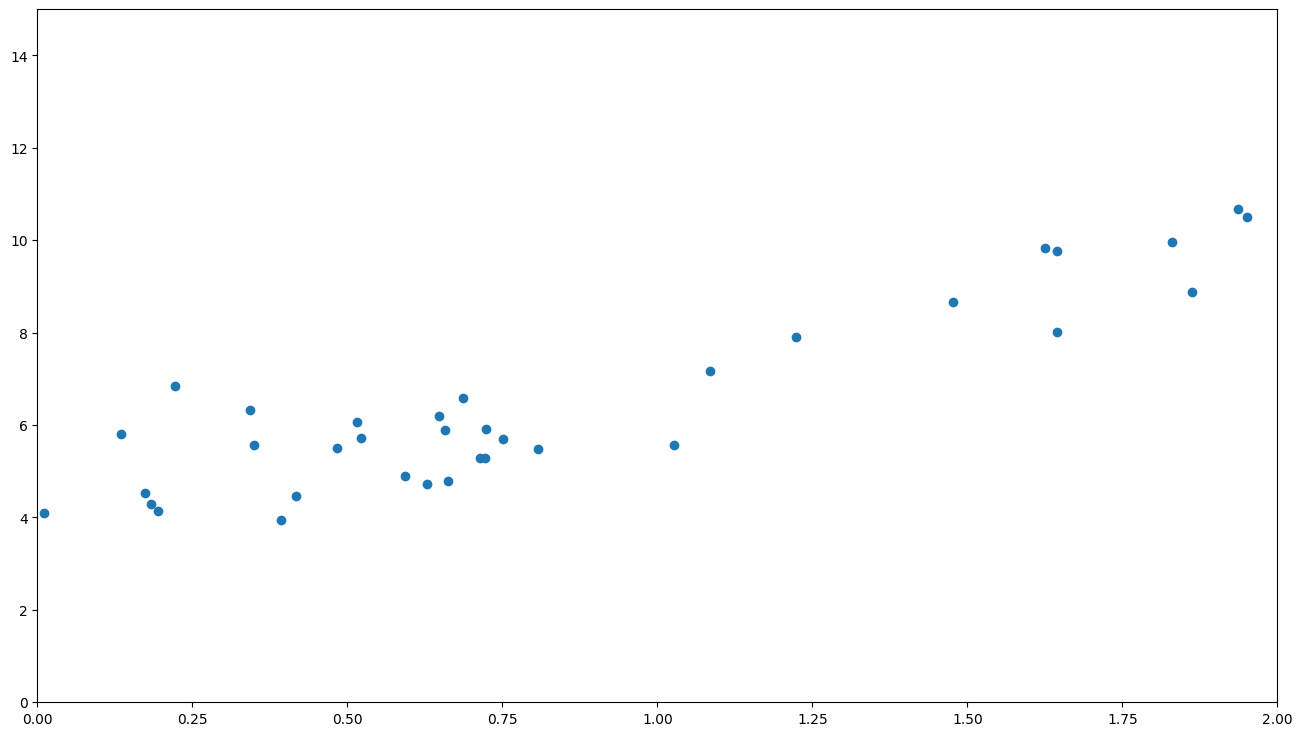

[[ 1.08512009]
 [-0.92683539]
 [-0.93145951]
 [ 0.48392454]
 [-3.82656049]]
[[ 7.18091435]
 [-0.69927737]
 [ 1.1791076 ]
 [ 5.51200384]
 [-5.01643936]]


In [327]:
# create coordinates datapoints which will create some kind of linear distribution
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(16, 9))
plt.scatter(X, y)
plt.axis((0, 2, 0, 15))
plt.show()

print(X[:5], y[:5], sep="\n")

\
$ \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

In [328]:
# give all features at position 0 value of 1, based on the specification at the description of linear regression
X_with1_at0index = np.c_[np.ones((100, 1)), X]

# compute inverse of a matrix & dot product, using the formula above
theta_best = np.linalg.inv(X_with1_at0index.T.dot(X_with1_at0index)).dot(X_with1_at0index.T).dot(y)
X_with1_at0index

array([[ 1.        ,  1.08512009],
       [ 1.        , -0.92683539],
       [ 1.        , -0.93145951],
       [ 1.        ,  0.48392454],
       [ 1.        , -3.82656049],
       [ 1.        , -3.44983567],
       [ 1.        , -1.12457506],
       [ 1.        , -2.02566224],
       [ 1.        ,  0.62849467],
       [ 1.        , -1.81604815],
       [ 1.        , -2.8246074 ],
       [ 1.        ,  2.93129754],
       [ 1.        , -0.4515526 ],
       [ 1.        ,  0.13505641],
       [ 1.        , -2.84949637],
       [ 1.        , -1.08876545],
       [ 1.        ,  0.22184518],
       [ 1.        , -2.30198715],
       [ 1.        ,  0.75139604],
       [ 1.        , -1.20127738],
       [ 1.        , -0.5833875 ],
       [ 1.        , -1.20341322],
       [ 1.        ,  3.70455637],
       [ 1.        , -0.02699445],
       [ 1.        , -2.11542186],
       [ 1.        ,  1.64508982],
       [ 1.        , -2.4416873 ],
       [ 1.        ,  0.41772719],
       [ 1.        ,

In [329]:
print("Best bias and weight:\n", theta_best)

Best bias and weight:
 [[4.02571435]
 [2.91986667]]


In [330]:
# now we can make predictions

# create new datapoints, just for example
X_few_features = np.array([[0], [2]])

# adjust again the datapoints, so they will have value of 1 at position 0
X_few_with1_at_0index = np.c_[np.ones((2, 1)), X_few_features]

# make predictions
y_predict_few_features = X_few_with1_at_0index.dot(theta_best)

# based on the bias and weights we computed above, we can make predictions on y datapoints, which in this case output 3.9 and 9.6. This means that first datapoint x with corresponding prediction y will have coordinates (0, 3.9) and second (2, 9.6)
print(X_few_features,
      X_few_with1_at_0index,
      y_predict_few_features,
      sep="\n")

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[4.02571435]
 [9.86544768]]


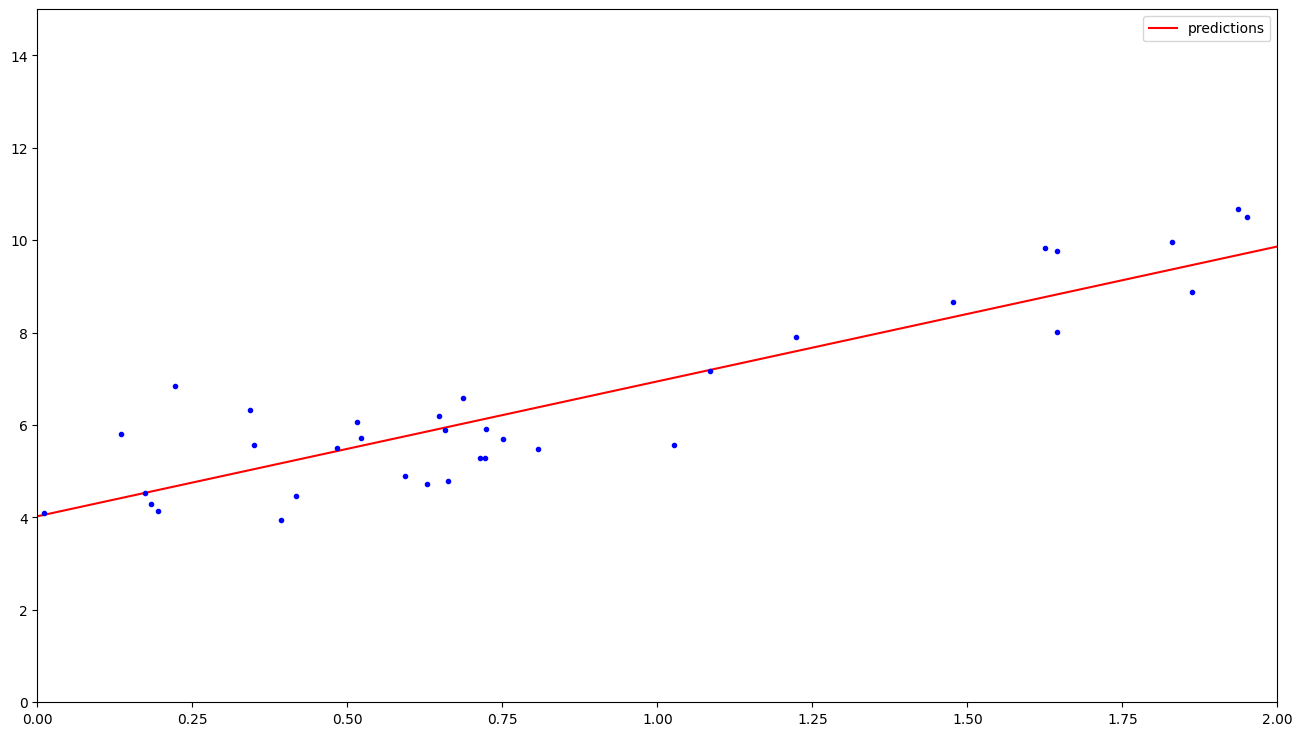

In [331]:
# plot models prediction
plt.figure(figsize=(16, 9))
plt.plot(X_few_features, y_predict_few_features, "r-", label="predictions")
plt.plot(X, y, "b.")
plt.axis((0, 2, 0, 15))  # set scale of x and y axes with list
plt.legend()
plt.show()

In [332]:
# compare with sklearn linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# bias 3.9 and weights 2.8
lin_reg.intercept_, lin_reg.coef_  # this will display the same result as we computed manually as theta_best

(array([4.02571435]), array([[2.91986667]]))

In [333]:
# sklearn's predictions on the same little data. Results are the same.
lin_reg.predict(X_few_features)

array([[4.02571435],
       [9.86544768]])

In [334]:
# compare sklearn model with mathematical model from scratch
np.allclose(lin_reg.predict(X_few_features), y_predict_few_features)

True

# GRADIENT DESCENT

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling $\theta$ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

![Gradient descent1](../images/gradient_descend_1.jpg)


![Gradient descent2](../images/gradient_descend_2.PNG)

It is important to choose right learning rate. If it is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if it is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

# BATCH GRADIENT DESCENT

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation below computes the partial derivative of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial \theta_j}MSE(\theta)$.

#### PARTIAL DERIVATIVE OF THE COST FUNCTION (example of MSE here)
$ \frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)} $ 


#### QUESTION TL:
Explain partial derivative like I am 5.

#### Answered by GPT-3.5:
Let's imagine you have a big bumpy mountain, and you want to know how steep it is when you're standing at a particular spot on the mountain. Now, think of a mountain as a mathematical shape, like a play-dough (plastelina) sculpture. A partial derivative is like looking at the steepness of the mountain in just one direction, even though the mountain might slope in different ways.
\
So if you are standing on the mountain and you want to know how steep it is if you walk only to the left, that's a partial derivative. If you want to know how steep it is if you walk only to the right, that's another partial derivative. If you want to know how steep it is if you walk only to the right, that's another partial derivative. And so on.
\
In simpler terms, it's like trying to understand how things change when you move a little-bit in just one direction, even though there might be other changes happening around you. So, a partial derivative helps you focus on one part of the picture instead of the whole thing. 

GRADIENT VECTOR
Instead of computing these partial derivatives individually for each model parameter $\theta_j$, you can use Equation below to compute them all in one go. The gradient vector, noted $\nabla_\theta MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).

$ \nabla_\theta MSE(\theta) = \begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta) \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m} X^T \cdot (X \cdot \theta - y)$

Notice that this formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

$\nabla_\theta$ - denotes the gradient with respect to the parameters $\theta$
$MSE(\theta)$ - is the cost function, Mean Squared Error in this case
$\theta = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 & \hdots & \theta_n \end{bmatrix}$ - parameter vector, which for example in case of linear regression has bias $\theta_0$ and weights $\theta_1$ to $\theta_n$

The gradient is a vector containing the partial derivatives of the cost function with respect to each parameter. Each element in the vector represents the sensitivity of the cost function to a small change in the corresponding parameter.

$\frac{\partial}{\partial \theta_0}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_0$
$\frac{\partial}{\partial \theta_1}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_1$
$\frac{\partial}{\partial \theta_n}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_n$

This vector is used in optimization algorithms like gradient descent. The update rule for each parameter in the iteration of an optimization algorithm might look like:
$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}MSE(\theta)$
$\alpha$ Alpha (also used as Eta $\eta$) is the learning rate and $j$ ranges from 0 to $j$. I guess index $j$ can be actually marked as $n$ because we are talking here about the $j$th/$n$th parameter associated with a given feature, if I'm not mistaken. 
This process iteratively adjusts the parameters to minimize the Mean Squared Error.


#### Question TL

Is it true, that if we have for example 3 parameters in a machine learning problem and we use $\nabla_\theta MSE(\theta)$ formula above, does it mean that the cost function is 3 dimensional? Meaning a gradient descend will be a vector, pointing in the direction which will be result of $\theta$?

#### Answered by GPT-3.5

Yes, that's correct. If you have three parameters $(\theta_0, \theta_1, \theta_2)$, in a machine learning problem, and you compute the gradient of the cost function using the formula you provided, then the cost function is three-dimensional. The resulting gradient vector would indeed be in three-dimensional space, representing the direction of steepest ascent in the cost function's surface.

In more general terms:
If you have $n$ parameters, $(\theta_0, \theta_1, \theta_n_-_1)$, the cost function is $n$-dimensional.
The gradient vector $\nabla_\theta MSE(\theta)$ is also $n$-dimensional, representing the direction of steepest ascent in the cost function's surface.
Each element in the gradient vector corresponds to the partial derivative of the cost function with respect to the corresponding parameter. The gradient vector points in the direction of the steepest ascent in the $n$-dimensional space of the cost function.

### Question TL
So to put it all together we have total 4 dimensional space where 3 dimensions are dimensions of those 3 parameters and one dimension will be actually the result of the cost function which was computed with those 3 parameters and features?

### Answered by GPT-3.5
Exactly! In the context of a machine learning problem with three parameters $(\theta_0, \theta_1, \theta_2)$ the space you're navigating through during the optimization process is four-dimensional. Here's a breakdown of each dimension:
$\theta_0$ - One axis represents the values of the first parameter $\theta_0$.
$\theta_1$ - Another axis represents the values of the second parameter $\theta_1$.
$\theta_2$ - Yet another axis represents the values of the third parameter $\theta_2$.
Cost Function Dimension - The final dimension represents the values of the cost function, like for example $(MSE(\theta_0, \theta_1, \theta_2))$ computed based on the current values of the parameters.

In summary, it's a four-dimensional space where you optimize the parameters to minimize the cost function, which is a function of those parameters.

### P.S. TL
To give you some idea what is going on visually continue below in this notebook, and you will find there 3D plots of the cost function and parameters.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ (Eta) comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step.

$ \theta^{(next step)} = \theta - \eta  \nabla_\theta MSE(\theta) $

In [335]:
eta = 0.1  # this is learning rate
n_iterations = 1_000
m = 100 # number of observations
theta = np.random.randn(2, 1)  # random initialization of parmaters

for iteration in range(n_iterations):
    # compute partial derivatives in one go and get the gradient vector.
    gradients = 2 / m * X_with1_at0index.T.dot(X_with1_at0index.dot(theta) - y)
    
    # update parameters
    theta = theta - eta * gradients

# see again that the resulting bias and weights are the same as we computed above many times with different methods
theta

array([[4.02571435],
       [2.91986667]])

In [336]:
# Define the loss function for linear regression
def loss_function(theta0, theta1, X, y):
    m = len(y)
    predictions = theta0 + theta1 * X
    squared_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

In [337]:
theta_batchGD_parm0 = []
theta_batchGD_parm1 = []
batchGD_loss = []
def plot_batch_gradient_descent(theta__, eta__, visualise=False):
    """
    
    :param theta__: parameters 
    :param eta__: learning rate
    :return: 
    """
    m = len(X_with1_at0index)
    plt.plot(X, y, "bx") # plot blue x points
    n_iterations = 200
    
    for iteration in range(n_iterations):
        # JUST FOR VISUALISATION -----------------------------------------------------------------
        # used for plotting of progress of theta parameter/s
        if visualise:
            theta_batchGD_parm0.append(theta__[0])
            theta_batchGD_parm1.append(theta__[1])
            batchGD_loss.append(loss_function(theta__[0], theta__[1], X, y))
        # plot the line every xth iteration
        if iteration % 2 == 0:
            y_predict = X_few_with1_at_0index.dot(theta__)
            style = "b-" if iteration > 0 else "r--" # red is the first line, blue is the rest
            plt.plot(X_few_features, y_predict, style)
        # ----------------------------------------------------------------------------------------
        
        # compute gradient vector
        gradients = 2 / m * X_with1_at0index.T.dot(X_with1_at0index.dot(theta__) - y)      
        
        # update parameters
        theta__ = theta__ - eta__ * gradients
        
    print(f"Theta best with {eta__}lr\n", theta__)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.title(r"$\eta = {}$".format(eta__), fontsize=16)

Theta best with 0.02lr
 [[4.02422504]
 [2.91968066]]
Theta best with 0.1lr
 [[4.02571435]
 [2.91986667]]
Theta best with 0.5lr
 [[ 1.31020029e+74]
 [-1.04901303e+75]]


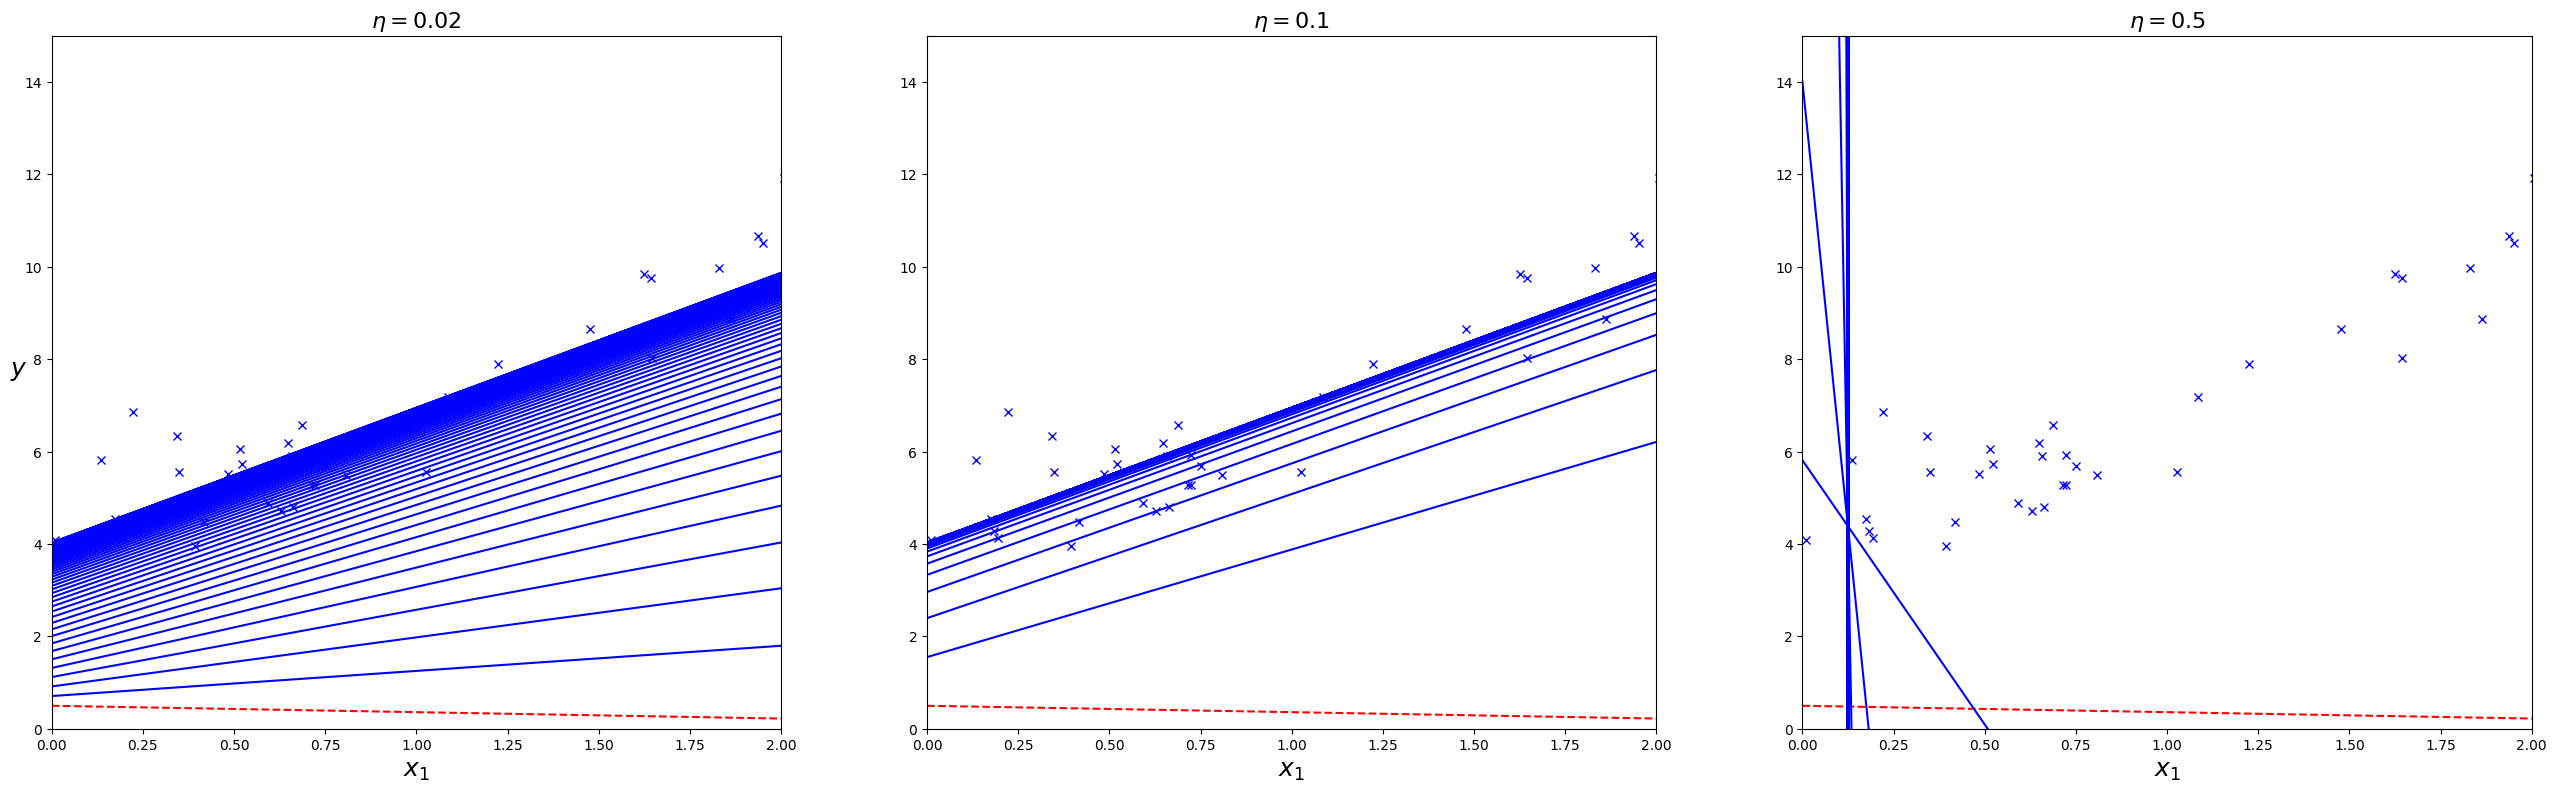

In [338]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization of parameters

plt.figure(figsize=(32, 9))
plt.subplot(131)
plot_batch_gradient_descent(theta, eta__=0.02, visualise=True)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_batch_gradient_descent(theta, eta__=0.1)
plt.subplot(133)
plot_batch_gradient_descent(theta, eta__=0.5)
plt.show()

# plot below will show us how learning changes based on size of learning rate. On the left side, the learning rate is too small, so it will take a longer time to converge. In the middle, the learning rate is just right, so it will converge in a reasonable amount of time. On the right side, the learning rate is too high, so it will diverge.
# compared to stochastic gradient descend, this batch gradient descend is very systematic and goes seamlessly to the minimum, as you see on the lines below (provided of course, there is correct learning rate)

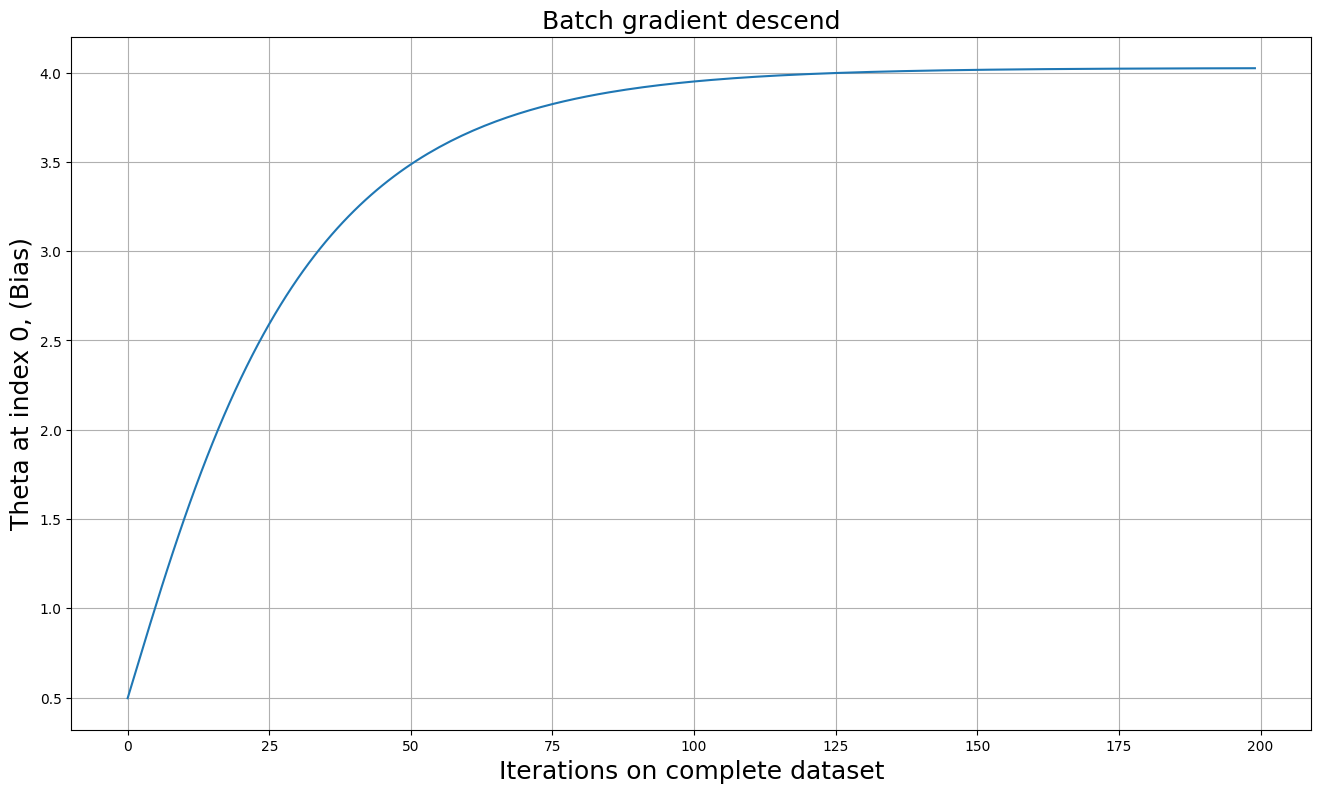

In [339]:
def plot_theta_progress(title,
                        theta_container,
                        xlabel,
                        set_axis=False,
                        axis=None):
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.ylabel("Theta at index 0, (Bias)", fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    if set_axis:
        plt.axis(axis)
    plt.title(title, fontsize=18)
    plt.plot(theta_container)
    plt.show()
    
    
plot_theta_progress("Batch gradient descend", theta_batchGD_parm0, "Iterations on complete dataset")

# Batch gradient descend goes directly to the best parameter result, the line is perfectly clean.

 # STOCHASTIC GRADIENT DESCENT
 The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.).
 
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.
    
 When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.
 
Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [340]:
m = len(X_with1_at0index)
np.random.seed(42)
m

100

Theta best
 [[4.11819641]
 [2.93507227]]


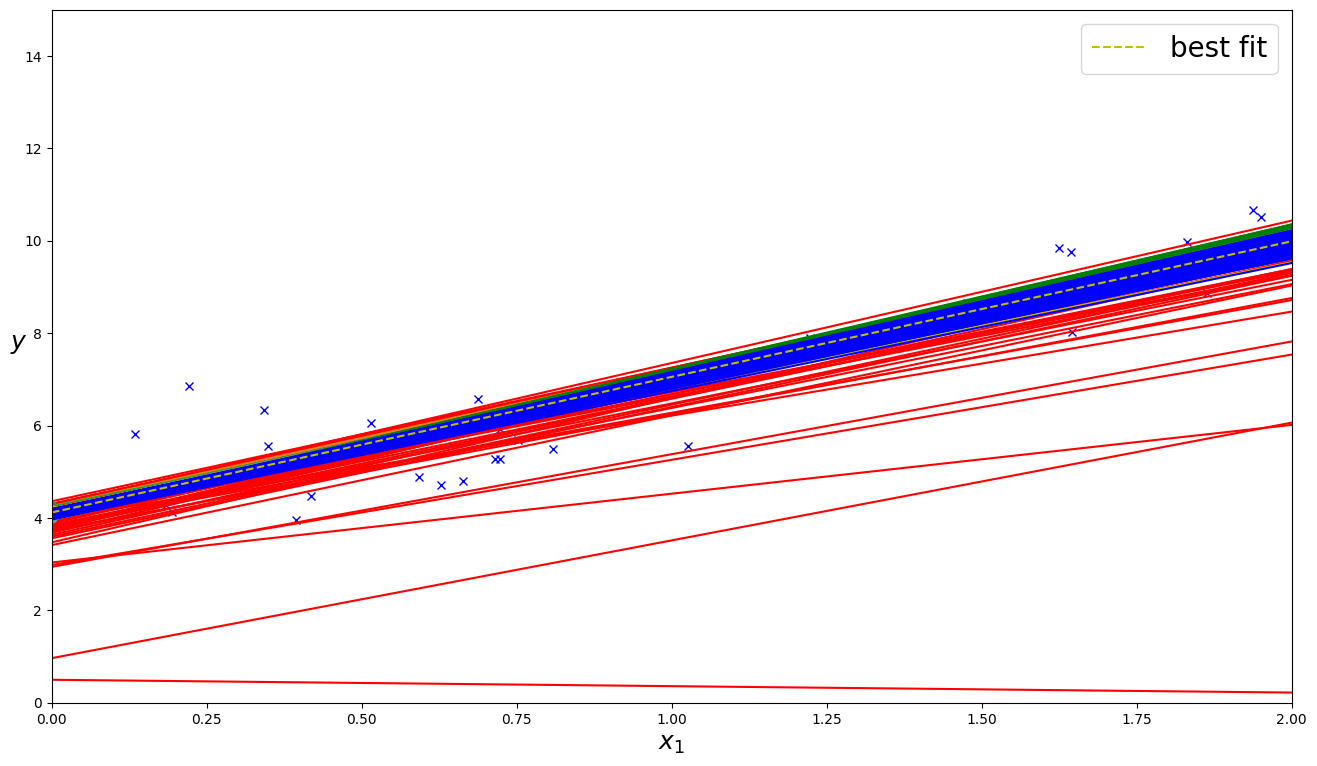

In [341]:
def make_plt_lines_colorful(epoch, n_epochs):
    """
    This function will return different color for each each basket of epochs
    
    :param epoch: current epoch
    :param n_epochs: total number of epochs
    """

    colors = ["r-", "o-", "y-", "g-", "b-"]
    epochs = [n_epochs*0.166, n_epochs * 0.332, n_epochs * 0.498, n_epochs * 0.664, n_epochs*83]
    
    if epoch <= math.floor(epochs[0]):
        return colors[0]
    elif epoch < math.floor(epochs[1]):
        return colors[1]
    elif epoch < math.floor(epochs[2]):
        return colors[2]
    elif epoch < math.floor(epochs[3]):
        return colors[3]
    elif epoch < math.floor(epochs[4]):
        return colors[4]


def learning_schedule(t):
    # basically the higher the 't', the lower the learning rate. This means that if you gonna input t as epoch, the learning rate will be lower and lower with each epoch.
    t0, t1 = 5, 50  # learning schedule hyperparameters
    return t0 / (t + t1)

theta_SGD_parm0 = []
theta_SGD_parm1 = []
SGD_loss = []

def plot_stochastic_gradient_descend(theta__):
    plt.figure(figsize=(16, 9))
    m = len(X_with1_at0index)
    plt.plot(X, y, "bx") # plot blue x points
    n_epochs = 20

    # what does this double for loop mean? It means go through all epochs and for each epoch go through dataset 'm' times and pick random datapoint instance from the dataset.
    for epoch in range(n_epochs):
        for i in range(m):
            # JUST FOR VISUALISATION ------------------------------------------------------------
            theta_SGD_parm0.append(theta__[0]) 
            theta_SGD_parm1.append(theta__[1])
            SGD_loss.append(loss_function(theta__[0], theta__[1], X, y))
            if i % 5 == 0: # plot every xth line
                y_predict_ = X_few_with1_at_0index.dot(theta__)
                style = make_plt_lines_colorful(epoch, n_epochs)
                plt.plot(X_few_features, y_predict_, style)
            # ----------------------------------------------------------------------------------
            
            # take random instance from the training set
            random_index = np.random.randint(m)
            x_instance = X_with1_at0index[random_index:random_index + 1]
            y_instance_true = y[random_index:random_index + 1]
            
            # compute gradient vector and update parameters 
            # I guess since we are using only one instance from the dataset, there is no need to divide by 'm' (Am I right?)
            gradients = 2 * x_instance.T.dot(x_instance.dot(theta__) - y_instance_true)
            eta = learning_schedule(epoch * m + i) # learning rate
            theta__ = theta__ - eta * gradients
            
    y_predict_ = X_few_with1_at_0index.dot(theta__)                
    plt.plot(X_few_features, y_predict_, "y--", label="best fit")
    print(f"Theta best\n", theta__)
    plt.legend(fontsize=20)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.show()

plot_stochastic_gradient_descend(theta__=theta)

# You see that the lines are more random, but eventually they will all converge to a single solution. However, due to their stochastic (i.e., random) nature, they will never settle at the minimum. Instead, they will keep oscillating around the minimum. By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:

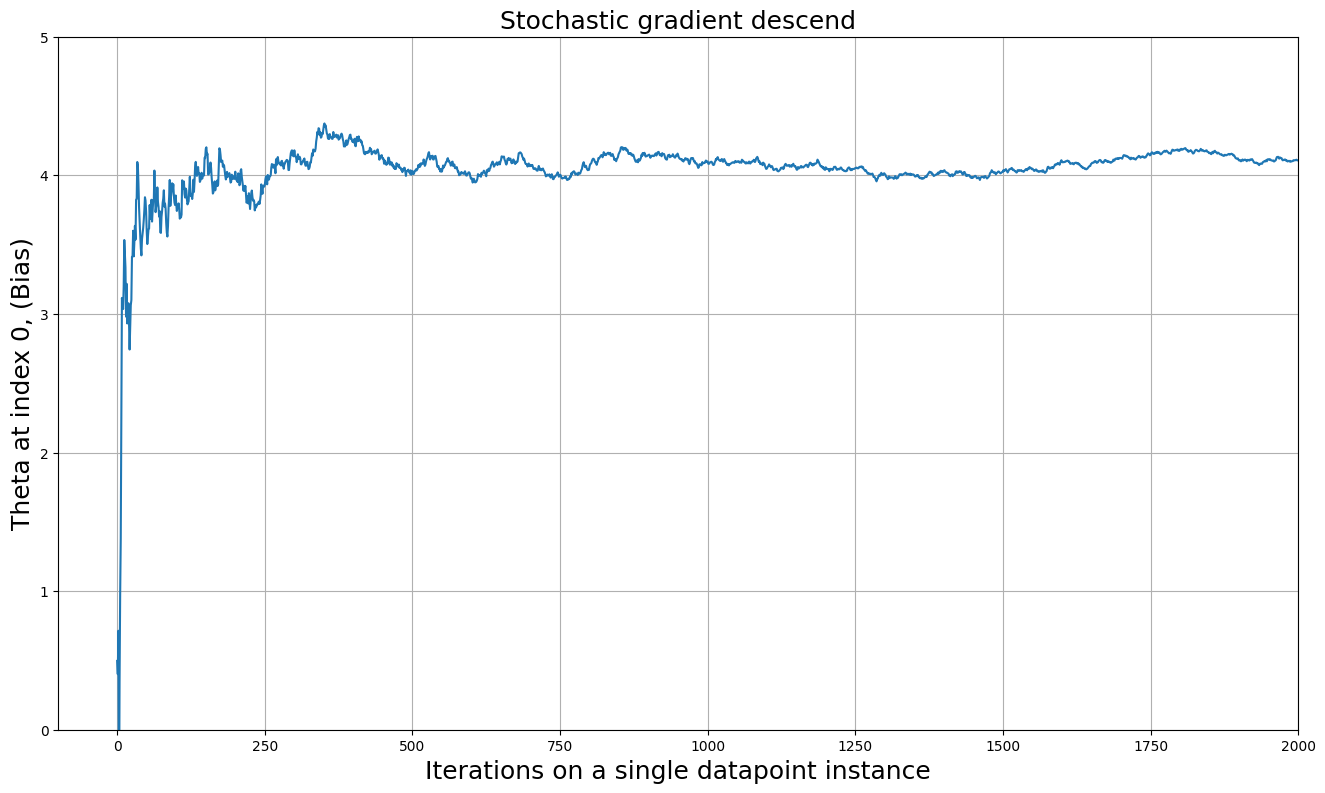

In [342]:
plot_theta_progress("Stochastic gradient descend",
                    theta_SGD_parm0,
                    "Iterations on a single datapoint instance",
                    set_axis=True,
                    axis=(-100, 2000, 0, 5))

# Below you see how SGD due to its randomness jumps all around. Also you see that since we are using learning schedule, the learning rate is getting lower and lower, which means that the the curve is getting smoother with more iterations.

# MINI-BATCH GRADIENT DESCENT
Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Figure below shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

Theta best
 [[4.04163415]
 [2.87902519]]


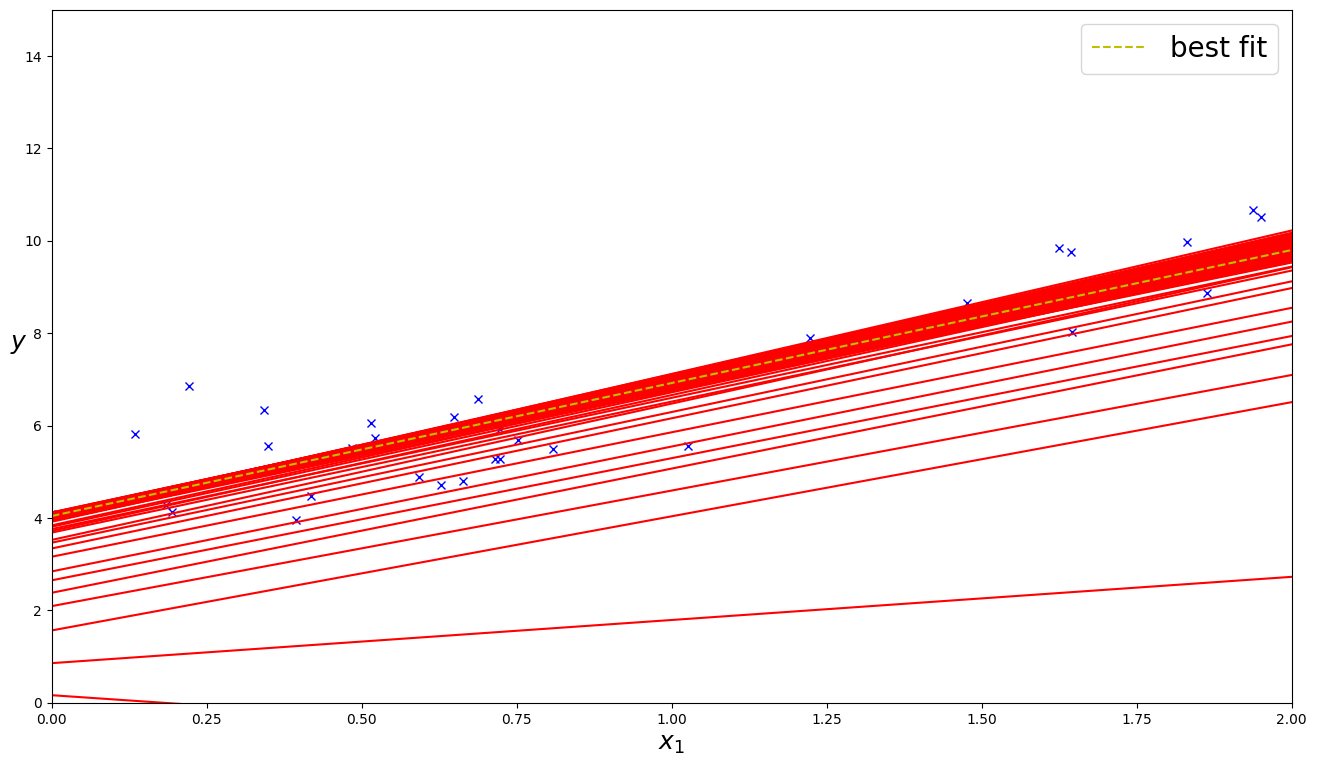

In [343]:
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 100, 1000
def learning_schedule_(t):
    return t0 / (t + t1)

theta_minibatchGD_parm0 = []
theta_minibatchGD_parm1 = []
minibatchGD_loss = []

def plot_minibatch_gradient_descend(theta__):
    plt.figure(figsize=(16, 9))
    plt.plot(X, y, "bx") # plot blue x points
    
    n_iterations = 100
    minibatch_size = 20
    t = 0
    
    for epoch in range(n_iterations):
        
        # shuffle before getting the minibatch each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_with1_at0index[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # start, end, step. This means if we have range 0-100 and step 20 (minibatch_size), we will get 0, 20, 40, 60, 80 for each 'i'. This means that each epoch we go through whole dataset which is split into mini-batches, and compute/update the parameters based on each mini-batch.
        for i in range(0, m, minibatch_size):
            # JUST FOR VISUALISATION ------------------------------------------------------------
            theta_minibatchGD_parm0.append(theta__[0]) 
            theta_minibatchGD_parm1.append(theta__[1])
            y_predict_ = X_few_with1_at_0index.dot(theta__)
            plt.plot(X_few_features, y_predict_, "r-")
            minibatchGD_loss.append(loss_function(theta__[0], theta__[1], X, y))
            # ----------------------------------------------------------------------------------
            
            t += 1
            x_instances = X_shuffled[i:i+minibatch_size]
            y_instances_true = y_shuffled[i:i+minibatch_size]
            # see that since we are now working with number of data-instances equal to minibatch_size, we need to divide by minibatch_size
            gradients = 2/minibatch_size * x_instances.T.dot(x_instances.dot(theta__) - y_instances_true)
            eta = learning_schedule_(t)
            theta__ = theta__ - eta * gradients
            
    y_predict_ = X_few_with1_at_0index.dot(theta__)                
    plt.plot(X_few_features, y_predict_, "y--", label="best fit")
    print(f"Theta best\n", theta__)
    plt.legend(fontsize=20)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.show()

plot_minibatch_gradient_descend(theta__=theta)
# for info, do not try to find any system in the line colors compared to previous plot where there were more colors of lines. It the previous example it was just some simple eye-balled logic to distinguish the lines

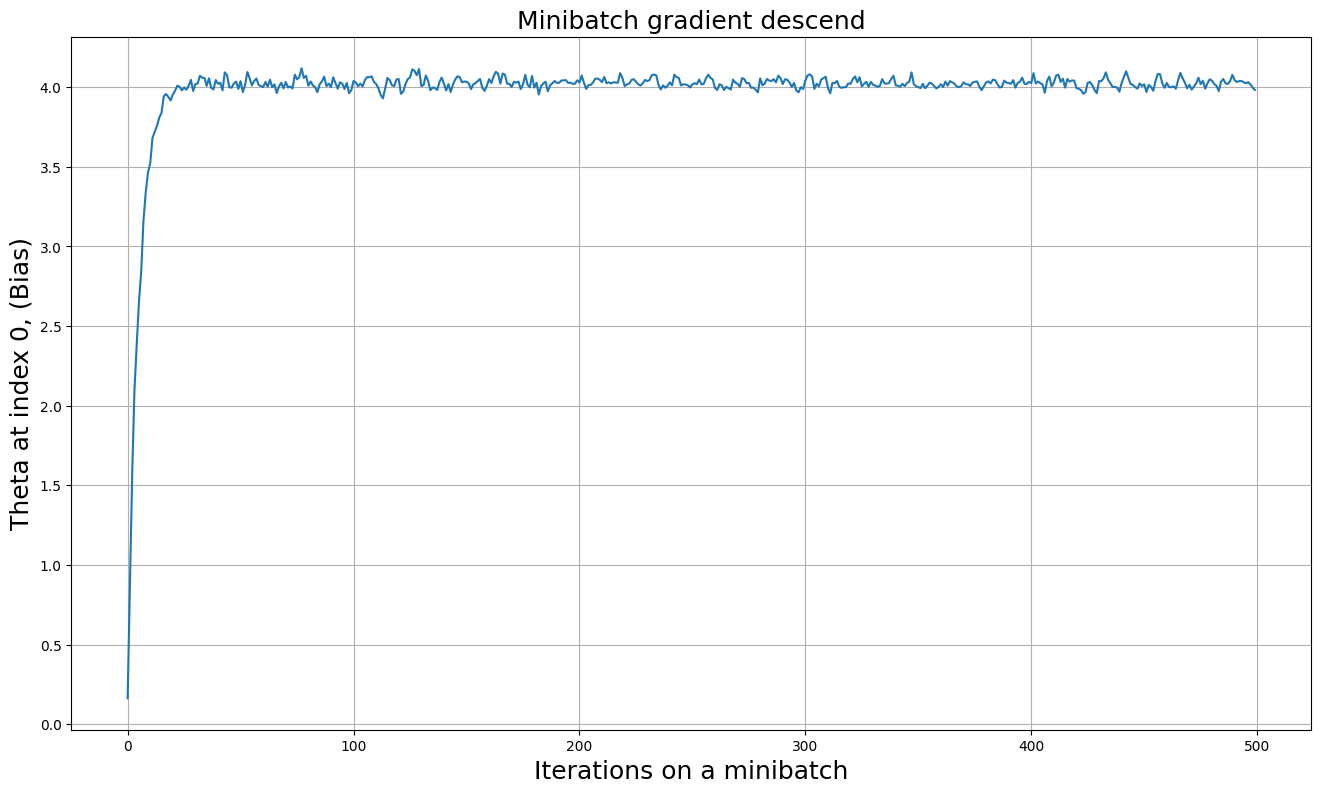

In [344]:
plot_theta_progress("Minibatch gradient descend",
                    theta_minibatchGD_parm0,
                    "Iterations on a minibatch")

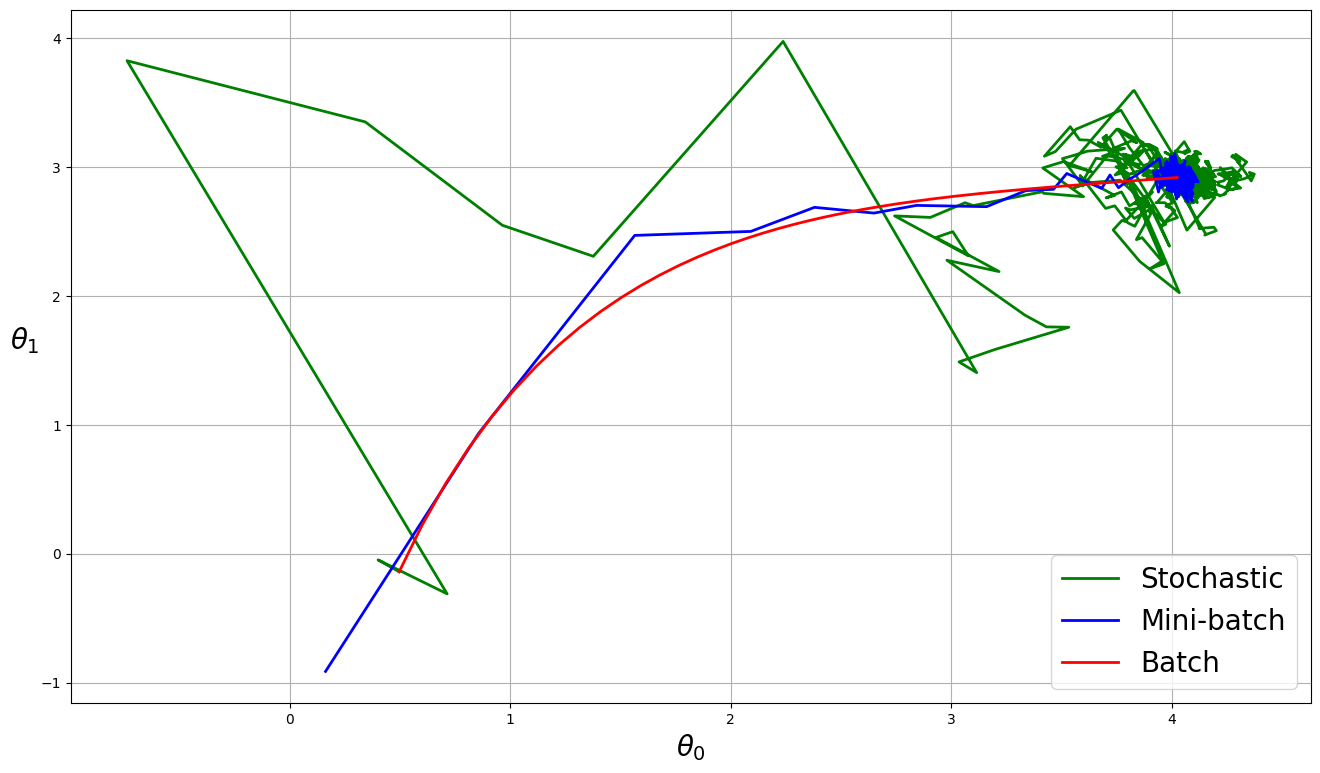

In [345]:
# compare how the theta parameters change over time. See that random initialization starts somewhere around 0, 0 and moves with time to the best result for all theta parameters. But notice, that you can fix a lot the stochastic behaviour by using learning schedule. Try to experiment with learning schedule with both stochastic GD's, and you will see that the curve will be much smoother (or rougher).

plt.figure(figsize=(16, 9))
plt.plot(theta_SGD_parm0, theta_SGD_parm1,"g-", linewidth=2, label="Stochastic")
plt.plot(theta_minibatchGD_parm0, theta_minibatchGD_parm1, "b-", linewidth=2, label="Mini-batch")
plt.plot(theta_batchGD_parm0, theta_batchGD_parm1, "r-", linewidth=2, label="Batch")
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.grid()
plt.legend(fontsize=20)
plt.show()

In [346]:


def plot_3D_graph_of_parameters_vs_loss(
        theta0,
        theta1,
        title,
        loss,
        elevation,
        azimut,
        plot_nr
):
    """
    
    :param theta0: Array of theta0 parameters
    :param theta1: Array of theta1 parameters
    :param title: Title of the plot
    :param loss: Array of loss values
    :param elevation: Adjust the elevation of the plot
    :param azimut: Adjust the rotation of the plot
    :param plot_nr: Make sure that each plot has different number
    :return: 
    """

    # create 3 meshgrids to get 3D coordinates for each point on the plot
    theta0_mesh, theta1_mesh = np.meshgrid(theta0, theta1)
    loss_vals = np.array([loss_function(theta0, theta1, X, y) for theta0, theta1 in zip(np.ravel(theta0_mesh), np.ravel(theta1_mesh))])
    loss_mesh = loss_vals.reshape(theta0_mesh.shape)
    
    # figure settings
    fig = plt.figure(figsize=(150, 150)) # size of plot
    ax = fig.add_subplot(plot_nr, projection='3d') # 3D projection
    ax.view_init(elev=elevation, azim=azimut) # elevation and rotation of plot
    

    # plot meshrids (2D arrays) against each other, meaning each point on the plot will have x, y and z coordinates, which will result in a "blanket" like visualization
    ax.plot_surface(theta0_mesh, 
                    theta1_mesh, 
                    loss_mesh, 
                    rstride=1, 
                    cstride=1,
                    cmap='viridis', 
                    edgecolor='none')
        
    # plot arrays of learning progress against each other and make a line/dots which go from top to the bottom of loss and best parameters 
    ax.scatter(theta_SGD_parm0, # X axis
               theta_SGD_parm1, # Y axis
               SGD_loss,        # Z axis
               color="green", 
               s=100, # size of the dots
               label="Stochastic gradient descend, moving to global minimum")    
    ax.scatter(theta_minibatchGD_parm0, 
               theta_minibatchGD_parm1,
               minibatchGD_loss, 
               color="blue", 
               s=100, 
               label="Minibatch gradient descend, moving to global minimum")
    ax.scatter(theta_batchGD_parm0, 
               theta_batchGD_parm1, 
               batchGD_loss, 
               color="red",
               s=100,
               label="Batch gradient descend, moving to global minimum")
        
    # Set labels and title
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$\theta_1$")
    ax.set_zlabel('Loss')
    ax.set_title(title)
    ax.legend()
    
    plt.show()


HOW TO READ THE PLOTS BELOW?

The slope/plain is the result of the combination at each given point (X, Y, Z) of (theta0, theta1, cost function) on a given batch of data. Seems that this I got confirmed both from some plots I found online and also by chat-GPT. The only thing I am unsure about is how the slope changes with regard to method used (batch, SGD, minibatch). Well, I think, that it is possible that the plain is still the same (perhaps the plain which we see at "batch" gradient descend is the actual slope, or the closes approximation of it, because there is nothing stochastic/random, and everything is computed and nothing is skipped = whole slope is changing shapes gradually) but we see deformations, big straight plains, of the slope (which is on the batchGD curly) on both of those stochastic gradient descends due to the fact that it takes a huge "steps" in the beginning. But I am not sure about that, needs to be confirmed by future me.

At each plot I decided to keep all 3 paths which lead to the global minimum but obviously only one belongs to each individual plot.


In [347]:
# todo: uncomment the plots below
# plot_3D_graph_of_parameters_vs_loss(
#     theta0=theta_batchGD_parm0, 
#     theta1=theta_batchGD_parm1, 
#     loss=batchGD_loss, 
#     title="Batch gradient descend", 
#     elevation=20, 
#     azimut=190, 
#     plot_nr=197
# )

In [348]:
# plot_3D_graph_of_parameters_vs_loss(
#     theta0=theta_SGD_parm0, 
#     theta1=theta_SGD_parm1, 
#     loss=SGD_loss, 
#     title="Stochastic gradient descend", 
#     elevation=20, 
#     azimut=190, 
#     plot_nr=198
# )

In [349]:
# plot_3D_graph_of_parameters_vs_loss(
#     theta0=theta_minibatchGD_parm0, 
#     theta1=theta_minibatchGD_parm1, 
#     loss=minibatchGD_loss, 
#     title="Minibatch gradient descend", 
#     elevation=20, 
#     azimut=190, 
#     plot_nr=199
# )

In [350]:
# THIS CELL IS JUST A PLAYGROUND FOR ME TO UNDERSTAND HOW TO PLOT 3D GRAPHS, UNCOMMENT IF YOU WANT TO SEE IT
# _ = np.linspace(1, 100, 100)
# a, b = np.meshgrid(_, _)
# d = np.linspace(1, 100, 100)
# e = np.linspace(1, 100, 100)
# f = (d - 4) ** 2 + (e - 3) ** 2
# MSE = (a - 4) ** 2 + (b - 3) ** 2
# 
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=20, azim=90)
# ax.view_init(elev=20, azim=250)
# ax.plot_surface(a, b, MSE, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# ax.scatter(d, e, f, color="red")
# plt.show()

Comparison of algorithms for linear regression

| Algorithm | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn |
| --- | --- | --- | --- | --- | --- | --- |
| Normal Equation | Fast | No | Slow | 0 | No | LinearRegression |
| Batch GD | Slow | No | Fast | 2 | Yes | n/a |
| Stochastic GD | Fast | Yes | Fast | >=2 | Yes | SGDRegressor |
| Mini-batch GD | Fast | Yes | Fast | >=2 | Yes | n/a |


# POLYNOMIAL REGRESSION

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

First example will be on quadratic data based on the quadratic equation. Note that the formula below works only on one datapoint per each feature. If you have more feature points per each feature instance, look at the example below this one.
$y = ax^2 + bx + c$ \
$y = 0.5x^2 + x + 2 + \epsilon$, where $\epsilon$ is a random noise added to the data.

#### Question TL
In polynomial regression, if we have 2 feature datapoints per each feature instance, how is the y computed? Give exact and visual answer.

#### Answered by GPT-4
In polynomial regression, the value of $y$ (the dependent variable) for a given set of feature data points is computed using a polynomial equation that models the relationship between the independent variables (features) and $y$. When you mention "2 feature data points per each feature instance," it implies that each instance of your data has two features (let's call them $x_1$ and $x_2$).

For a simple example, let's consider a polynomial regression model that includes both features and their interactions up to a certain degree. The equation for such a model could look something like this:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1^2 + \beta_4x_2^2 + \beta_5x_1x_2 + \cdots$

Where:
- $y$ is the predicted output.
- $x_1$ and $x_2$ are the features.
- $\beta_0, \beta_1, \beta_2, \cdots$ are the model coefficients, determined during the model training process.

The exact value of $y$ for a given set of $x_1$ and $x_2$ is computed by plugging those values into the model's equation.

For a visual explanation, let's illustrate this with a simple 2D example, considering only one feature $(x_1)$ for simplicity, and then explain how it extends to two features.

1. **Single Feature Polynomial Regression (for Visualization):**
    - Equation: $y = \beta_0 + \beta_1x_1 + \beta_2x_1^2$
    - This would typically result in a parabolic curve when plotted, with $x_1$ on the x-axis and $y$ on the y-axis.

2. **Extending to Two Features:**
    - With two features, the model becomes 3D, and visualizing it requires plotting with three axes $(x_1$, $x_2$, and $y)$.
    - Interactions between $x_1$ and $x_2$ (like $x_1x_2)$ introduce more complexity into the shape of the surface that represents the model.

To give you a visual sense of how $y$ is computed with two features, I'll create a simple 3D plot showing a polynomial surface. This will be a simplified representation assuming a model like $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1^2 + \beta_4x_2^2 + \beta_5x_1x_2$, just to illustrate the concept. Let's proceed with that visualization.

![Multivariate Polynomial Regression](..\images\polynomial_regression.png)

The visualization above illustrates a polynomial regression surface with two features $(x_1$ and $x_2)$. In this simplified example, the surface is generated by the polynomial equation:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1^2 + \beta_4x_2^2 + \beta_5x_1x_2$

where the coefficients $(beta)$ have been arbitrarily chosen to demonstrate the concept. The 3D plot shows how the value of $y$ varies with changes in $x_1$ and $x_2$. Each point on the surface represents a potential outcome $y$ for a given pair of feature values $(x_1$, $x_2)$.

In a real-world polynomial regression problem with two features, the exact shape of the surface would depend on the specific model coefficients, which are determined during the model training process based on the provided data. The surface could be more complex, especially with higher-degree polynomials and more interaction terms.

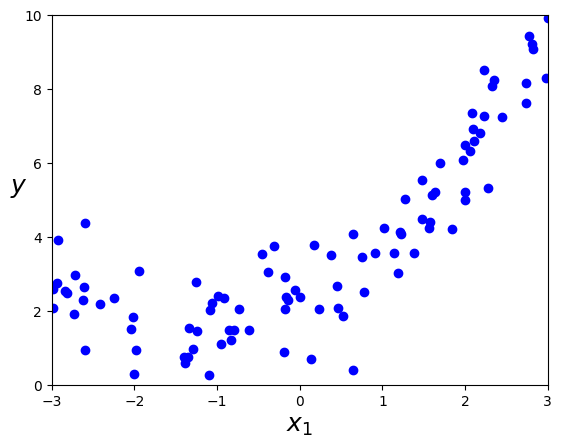

In [351]:
# generate data based on quadratic equation 
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, c="blue")
plt.axis((-3, 3, 0, 10))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlabel("$x_1$", fontsize=18)
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as new features (in this case there is only one feature).

In [352]:
# add a square (second degree polynomial) of each feature in the training set as a new feature
# Of course based on the problem, the degree of polynomial can be different, for example 3rd degree polynomial will be y = ax^3 + bx^2 + cx + d

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = polynomial_features.fit_transform(X)

print(f"Original data:\n{X[0]}", end="\n\n")
print(f"Original data + new feature point based on square of the original feature point:\n{X_polynomial[0]}")
print(X[0] ** 2 == X_polynomial[0][1])

Original data:
[0.39777686]

Original data + new feature point based on square of the original feature point:
[0.39777686 0.15822643]
[ True]


In [353]:
print(X[0])
print(X_polynomial[0])

[0.39777686]
[0.39777686 0.15822643]


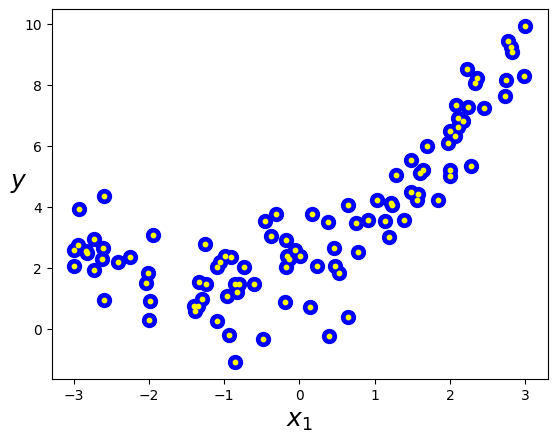

In [354]:
plt.scatter(X, y, c="blue", s=100)
plt.scatter(X_polynomial[:, 0], y, c="yellow", s=10)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlabel("$x_1$", fontsize=18)
plt.show()

# see that the data in X_polynomial at 0 index position is the same as in X, yellow dots are at the same position as blue dots.

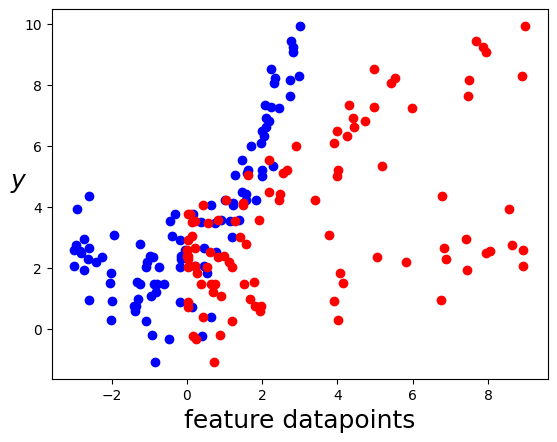

In [355]:
plt.scatter(X, y, c="blue") # original data vs target

# new feature points based on square of the original feature points vs target. Do not be fooled that it looks like linear data, when looking from bigger picture the red dots are also quadratic. Take look at one plot below this one, to get what I mean.
plt.scatter(X_polynomial[:, 1], y, c="red") 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlabel("feature datapoints", fontsize=18)
plt.show()

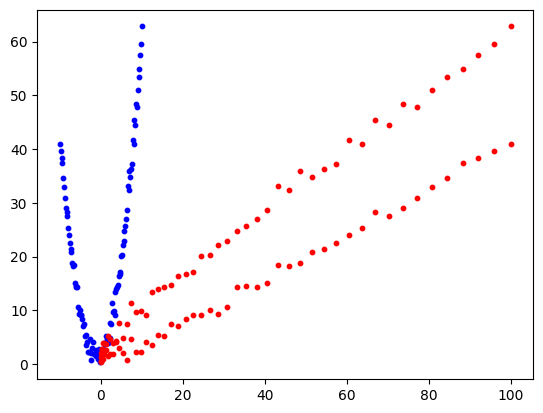

In [356]:
X__ = np.linspace(-10, 10, 100).reshape(100, 1)
X__polynomial = polynomial_features.transform(X__)
y__ = 0.5*X__**2 + X__ + 2 + np.random.randn(100, 1)

plt.scatter(X__, y__, c="blue", s=10)
plt.scatter(X__polynomial[:, 1], y__, c="red", s=10)

lin_reg.intercept_=array([1.99605152])
lin_reg.coef_=array([[1.10258894, 0.47282646]])


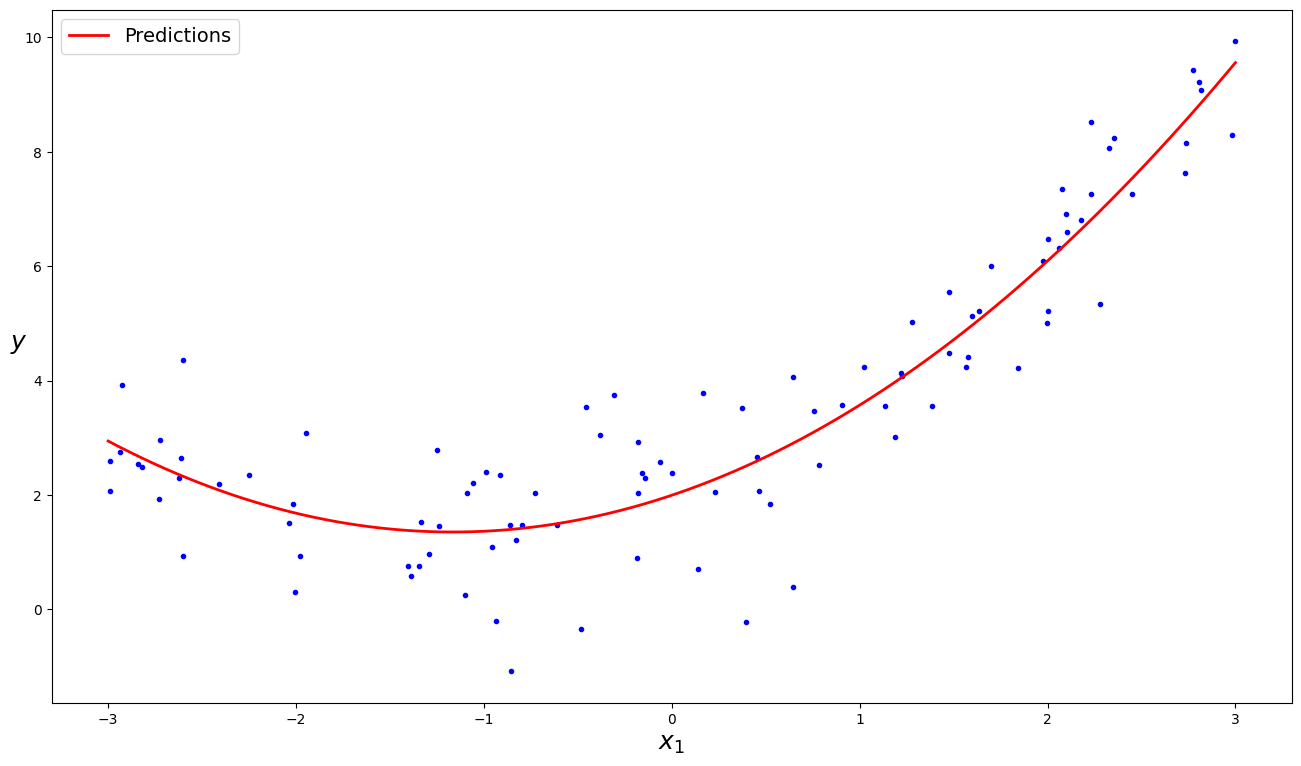

In [357]:
# X_poly now contains the original feature of X plus the square of this feature.
# Now you can fit a linear regression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_polynomial, y)
print(f"{lin_reg.intercept_=}", f"{lin_reg.coef_=}", sep="\n")

X_new_features = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = polynomial_features.transform(X_new_features)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(16, 9))
plt.plot(X, y, "b.")
plt.plot(X_new_features, y_new, "r-", linewidth=2, label="Predictions")
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlabel("$x_1$", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, this plot shows a 300-degree polynomial model on the preceding training data, and compares it to a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

In my own words by increasing the number of polynomial degree you increase the number of "wigles" or "curvatures" on the line which is trying to fit the data. So if you have for example specify 2nd degree polynomial, the result will just be "U" curvature because the number of curves is equal to number_of_polynomial_degree - 1.

The high-degree polynomial regression model (as displayed on the plot below) is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The code in one cell below this one defines a function that, given some training data, plots the learning curves of a model.

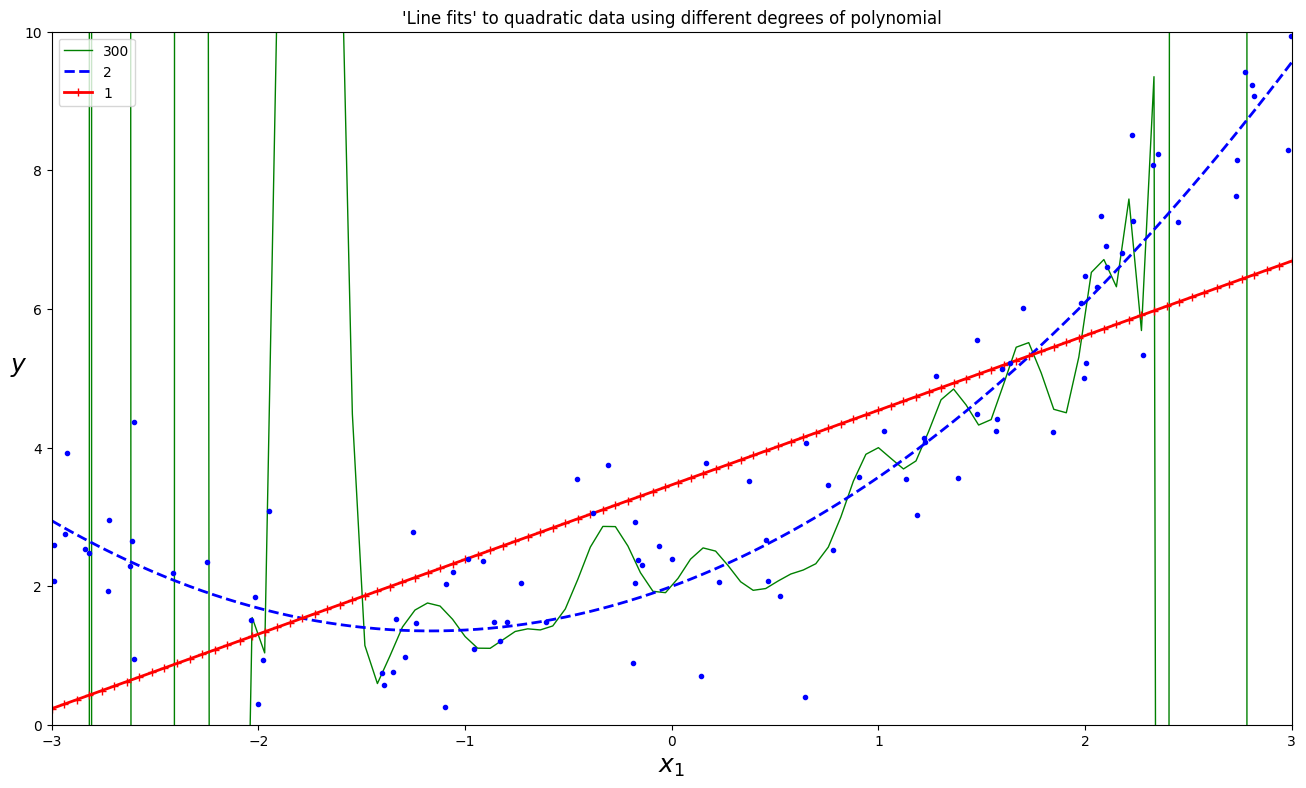

In [358]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(16, 9))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features), # makes new features based on degree of polynomial
            ("std_scaler", std_scaler), # standardize the data
            ("lin_reg", lin_reg), # fit the linear regression model
        ])
    polynomial_regression.fit(X, y)
    predictions = polynomial_regression.predict(X_new_features)
    plt.plot(X_new_features, predictions, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis((-3, 3, 0, 10))
plt.title("'Line fits' to quadratic data using different degrees of polynomial")
plt.show()

# LEARNING CURVES

In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    # main thing of this function is to show how the error changes with the number of training instances
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)    

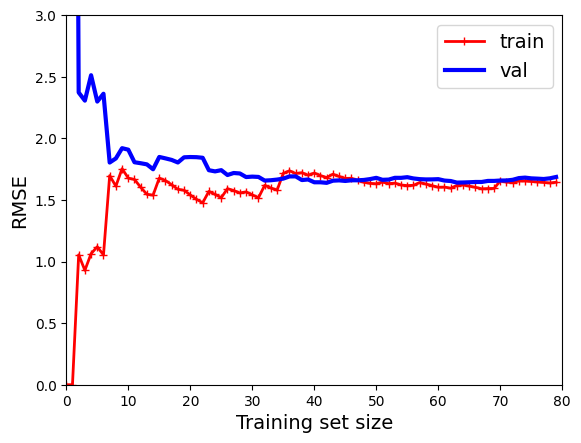

In [360]:
# apply just a simple linear regression on the quadratic dataset, demonstrating how the model is underfitting the data because obviously linear regression (meaning here just a strain fitting line) cannot fit quadratic data.
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis((0, 80, 0, 3))
plt.show()   

This model that's underfitting deserves a bit of explanation. First, let's look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero error. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that's underfitting. Both curves have reached a plateau; they are close and fairly high.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

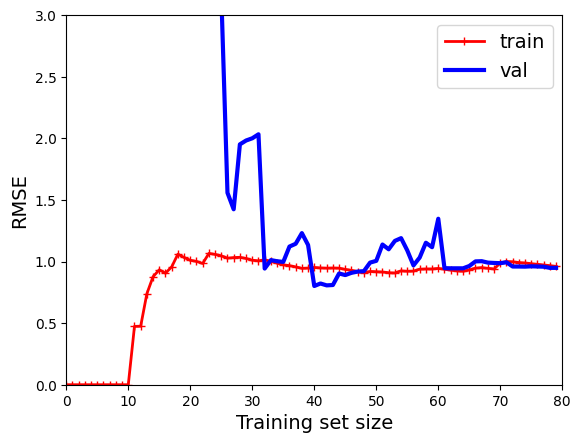

In [361]:
# try to use 10th degree polynomial model on the same quadratic dataset, simulating overfitting. Notice also on the plot that to the point where the number of feature instances was lower than the number of polynomial degree, there was no error, because the model was able to learn the data perfectly. But of course it learned only the training data, and not the validation data, therefore the error on the validation data was sky-high.

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis((0, 80, 0, 3))
plt.show()   

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. (Meaning the curves get closer to each other).

#### The Bias/Variance Tradeoff
An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

**Bias**: 
This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data. (For info, do not confuse this bias with bias term of linear regression)

**Variance**: 
This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

**Irreducible error**: 
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

Visual Analogy:
Imagine trying to hit a target with arrows. High bias is like consistently hitting the same spot, but far from the bullseye - your shots are biased away from the target. High variance is like shots scattered all over the target area - you're very sensitive to small changes (like the wind), causing a lot of variability in where your shots land. The ideal is a tight cluster of shots around the bullseye, minimizing both the bias (distance from the bullseye) and the variance (spread of the shots).

# REGULARIZED LINEAR MODELS
As we saw in Chapter 1, a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

So if I understand it correctly, we regularise only the weights, meaning we move with the slope of the curve, or "bumpyness/curvature" in case of polynomial problematics. The bias (intercept) stays untouched.

#### RIDGE REGRESSION
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^{n} \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

INFO/TIP:
It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

RIDGE REGRESSION COST FUNCTION

$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$

can be also written like this (Check the ridge regression .ipynb file for more info):
$J(\theta) = MSE(\theta) + \alpha \sum_{j=1}^{m} \theta_j^2$ 


Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not $0$). If we define $w$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $\frac{1}{2}(\lVert w \rVert_2)^2$, where $\lVert w \rVert_2$ represents the $\ell_2$ norm of the weight vector. For Gradient Descent, just add $\alpha w$ to the MSE gradient vector.

The expression $\| w \|_2^2$ represents the squared Euclidean norm (also called the L2 norm) of a vector $w$. Here's what each symbol means:

- $w$: A vector of coefficients or weights in the context of machine learning and linear regression. Each element of $w$ corresponds to the weight or coefficient associated with a feature in the model.

- $\| \cdot \|_2$: The L2 norm of a vector, which is a measure of the vector's magnitude (length) in Euclidean space. The L2 norm is defined as the square root of the sum of the squared elements of the vector.

- $(\| w \|_2)^2$: The square of the L2 norm of the vector $w$. Squaring the L2 norm amplifies the effect of larger values and is used in regularization terms (such as Ridge regression) to penalize large coefficients and prevent overfitting. The expression effectively sums up the squares of all elements in $w$ (i.e., the sum of squared coefficients).

In the context of Ridge regression, $(\| w \|_2)^2$ represents the regularization term added to the cost function to penalize large values of the coefficients, encouraging the model to keep the weights as small as possible while still fitting the data, thus improving the model's generalization ability.

In [362]:
# generate some linear data

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [363]:
from sklearn.linear_model import Ridge


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis((0, 3, 0, 4))

Figure below shows several Ridge models trained on some linear data using different $\alpha$ values. On the left, plain Ridge models are used, leading to linear predictions (i.e., polynomial regression without any polynomial features). On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias.

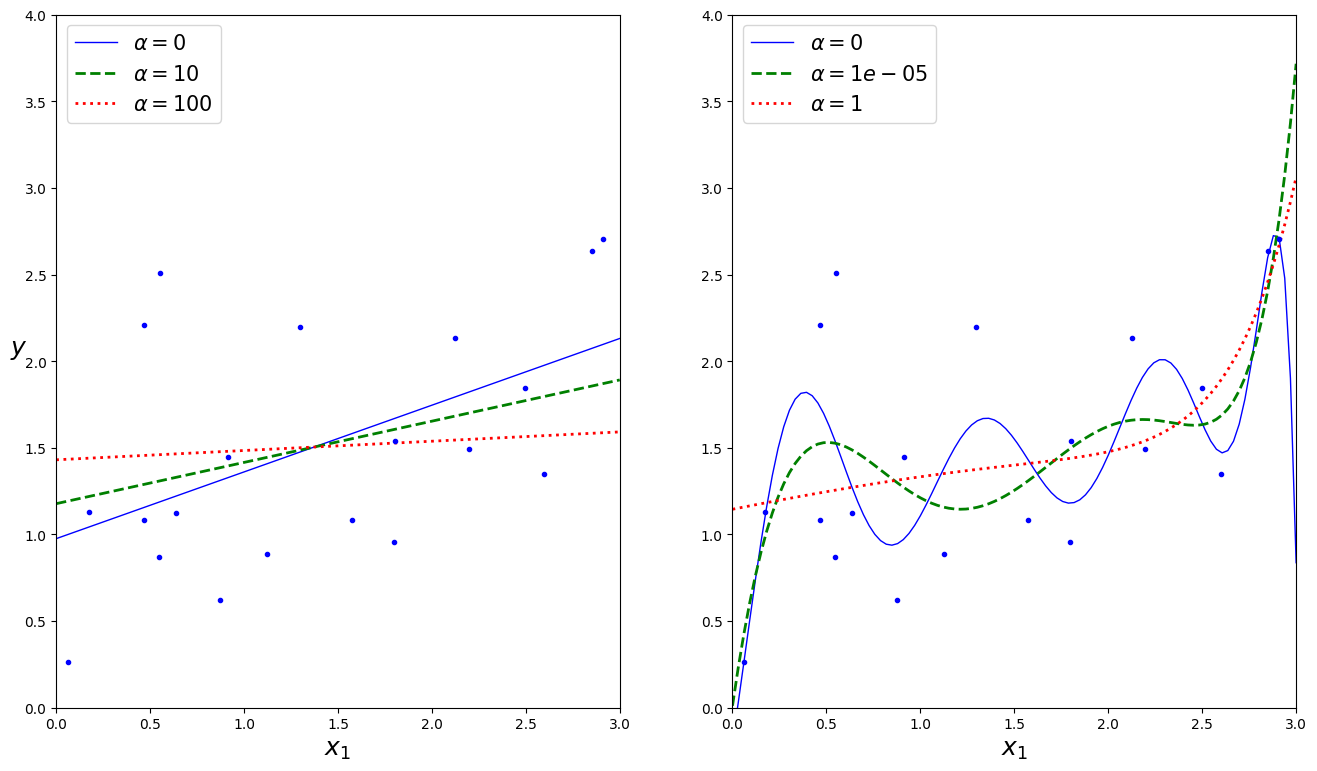

In [364]:
plt.figure(figsize=(16, 9))

# plot just linear regression with different regularization alpha parameters
plt.subplot(121)
plot_model(model_class=Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# plot polynomial regression with different regularization alpha parameters
plt.subplot(122)
plot_model(model_class=Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# See that the greater the regularization parameter alpha, the more the line is flat. This is because the model is more constrained.

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. Equation below shows the closed-form solution (where $A$ is the $n \times n$ identity matrix except with a $0$ in the top-left cell, corresponding to the bias term).
\
$\hat{\theta} = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$

In my own words, this equation is something similar to "normal equation" of linear regression problematics shown earlier. So this means you feed it whole dataset of features and labels and it spits out the best parameters directly (no iterative approach). If you want to dig deeper into this equation, researh it.

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of the preceding equation using a matrix factorization technique by André-Louis Cholesky):

In [365]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]) 

# you can check the graph above how the X is dependent on y. Here it just fits that 1.5 x also +- equal to 1.5 y. The same applies to the two models below.

array([[1.55071465]])

In [366]:
# compute with different solver
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

You can use also SGDRegressor, but with the penalty hyperparameter set to "l2" (which indicates that you want to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector, which is simply Ridge Regression).

In [367]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=100, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Here is an example how would a partial derivative look like, but double check it. If it's correct, I guess you should be able to have some +- idea how the gradient vector would look like.
$\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \theta^T x_i) x_{ij} + 2\lambda \theta_j$

In [368]:
# TODO: Check if a partial derivative/gradient vector of cost function is also exists for ridge regression. If yes, put it here and explain it.

#### LASSO REGRESSION
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm.

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


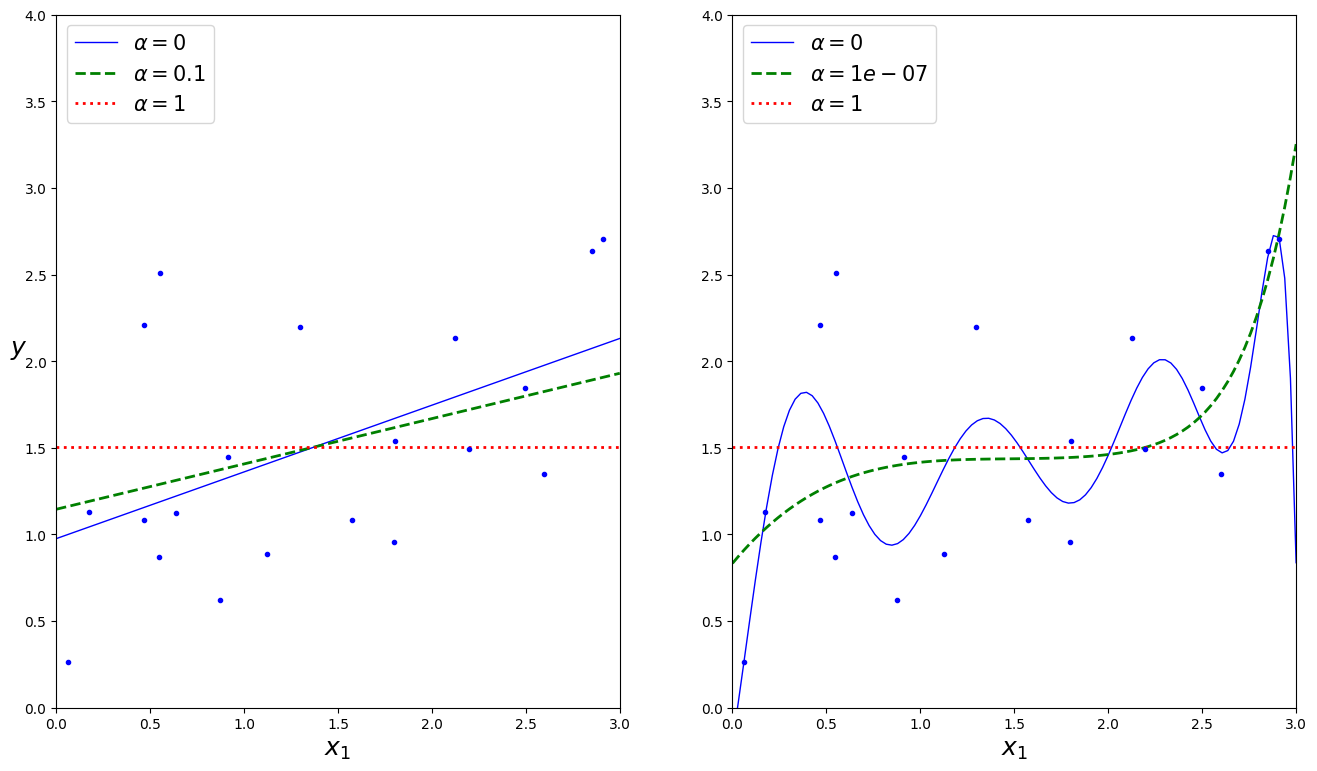

In [369]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(16,9))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [370]:
# example of lasso regression with scikit-learn
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [371]:
# Just like the example with ridge regression above with l2 penalty, but this time with "l1"
sgd_reg = SGDRegressor(penalty="l1", max_iter=100, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the right plot on Figure above (with $\alpha = 10^{-7}$) looks roughly quadratic, all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

See that the red dotted line on the right side above is linear, meaning the lasso regression must have set all the polynomial features to zero. (There must have stayed only bias and one weight nonzero) So it is like a linear regression...If I am correct...

You can get a sense of why this is the case by looking at Figure below; the axes represent two model parameters, and the background contours represent different cost/loss functions. In the top left plot, the contours represent the $\ell_1$ loss ($|\theta_1| + |\theta_2|$), which drops linearly as you get closer to any axis. For example, if you initialize the model parameters to $\theta_1 = 2$ and $\theta_2 = 0.5$, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore $\theta_2$ will reach 0 first (since it was closer to 0 to begin with). After that, Gradient Descent will roll down the gutter until it reaches $\theta_1 = 0$ (with a bit of bouncing around, since the gradients of $\ell_1$ never get close to 0: the are either -1 or 1 for each parameter). In the top right plot, the countours represent Lasso's cost function (i.e., an MSE cost function plus an $\ell_1$ loss). The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around $theta_1 = 0.25$ and $theta_2 = -1$: notice once again how the path quickly reaches $\theta_2 = 0$, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased $\alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha$, the global optimum would move right (in this example, the optimal parameters for unregularized MSE are $\theta_1 = 2$ and $\theta_2 = 0.5$).

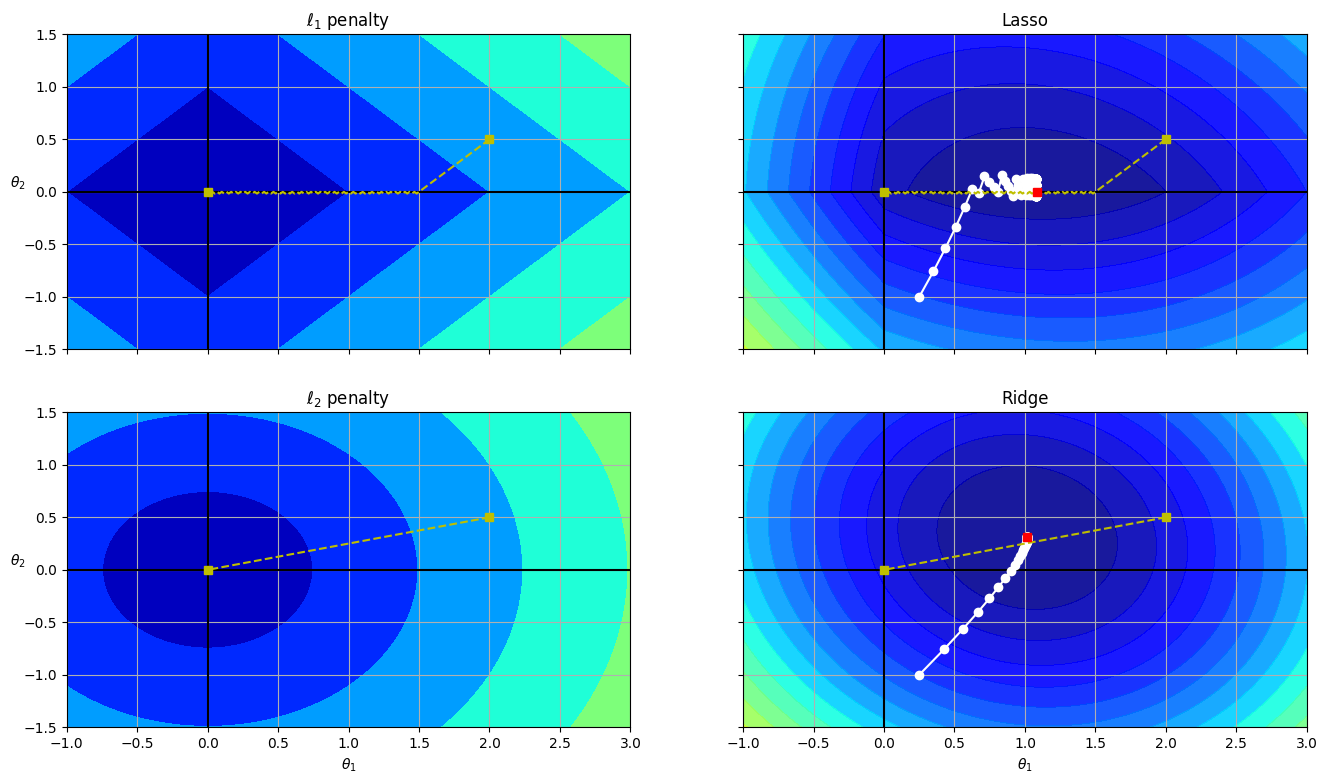

In [372]:
# If you want you can take some inspiration from how this plot was made, but there is no need to dig into it. It is important to understand the concept of lasso regression, not how to plot it at the moment.

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 9))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN, cmap="jet")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9, cmap="jet")
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()
# TODO: I'm not sure what author is trying to show with the yellow dashed lines. Needs to be researched.

The two bottom plots show the same thing but with an $\ell_2$ penalty instead. In the bottom-left plot, you can see that the $\ell_2$ loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. In the bottom-right plot, the contours represent Ridge Regression's cost function (i.e., an MSE cost function plus na $\ell_2$ loss). There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around). Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase $\alpha$, but they never get eliminated entirely.

To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum but the steps will get smaller and smaller, so it will converge).

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, \dots, n$), but Gradient Descent still works fine if you use a subgradient vector $\mathbf{g}$ instead when any $\theta_i = 0$. Equation below shows a subgradient vector $\mathbf{g}$ for the Lasso cost function when $\theta_3 = 0$.
You can think of a subgradient vector at a nondifferentiable point as an intermediate vector between the gradient vectors around that point.

Lasso regression subgradient vector

$g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha \begin{pmatrix} sign(\theta_1) \\ sign(\theta_2) \\ \vdots \\ sign(\theta_n) \end{pmatrix} \text{, where } sign(\theta_i) = \begin{cases} -1 & \text{if } \theta_i < 0 \\ 0 & \text{if } \theta_i = 0 \\ +1 & \text{if } \theta_i > 0 \end{cases}$

Question TL: 
Why is Lasso regression subgradient vector called subgradient and not gradient? What does it do differently?

Answer GPT4:
In Lasso regression, the term "subgradient" is used instead of "gradient" because the Lasso penalty term, which involves absolute values, is not differentiable at zero. This lack of differentiability means the traditional gradient does not exist at all points. The subgradient generalizes the concept of a gradient to accommodate such non-differentiable points, providing a set of possible values that can be used to perform optimization even when the gradient is undefined. This allows Lasso to effectively perform variable selection and regularization by shrinking certain coefficients to exactly zero.

Partial derivative:
$\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \theta^T x_i) x_{ij} + \lambda \cdot \text{sgn}(\theta_j)$

where $\text{sgn}(\theta_j)$ is the sign function, which is -1 for $\theta_j < 0$, 1 for $\theta_j > 0$, and undefined at 0 (hence, a range between -1 and 1 is used).

To sum it up, what is l1 and l2 norm?
l1 - is sum of absolute values of a vector
l2 - is square root of sum of squares of a vector

These formulas are then used together with cost function (like MSE, etc..). You can see it as a last part of the formula of cost function.

#### ELASTIC NET

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression (see Equation below).

Elastic Net cost function
$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1 - r}{2} \alpha \sum_{i=1}^{n} \theta_i^2$

So when should you use Linear Regression (without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [373]:
# example of elastic net using scikit-learn
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([1.54333232])

Partial derivative of one given theta of elastic net cost function.
TODO: Check if it is correct (was generated by GPT4) and if gradient descend is even relevant here. (Probably is, but check it)
$\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \theta^T x_i) x_{ij} + \lambda_1 \cdot \text{sgn}(\theta_j) + 2\lambda_2 \theta_j $

In [374]:
# TODO: The section with Ridge, Lasso and Elastic net was taken a lot theoretically. I guess the best thing to understand the mathematical formulas and the system of learning would be to try some predictions with these regularizations and plot it. Do it if you have time in next iteration.

#### EARLY STOPPING
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure below shows a complex model (in this case, a high-degree Polynomial Regression model) being trained using Batch Gradient Descent. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

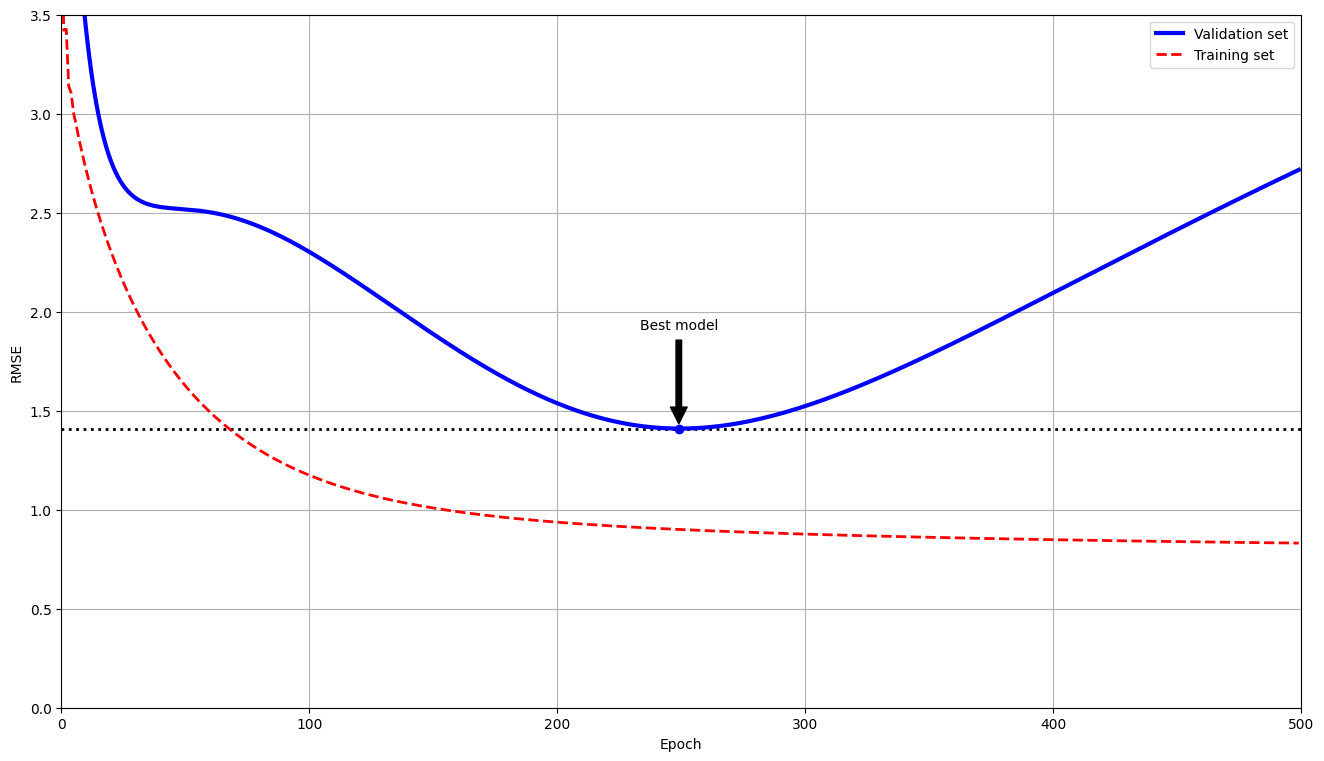

In [375]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create the same quadratic dataset and split it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors) # returns the index of the minimum value
plt.figure(figsize=(16, 9))

# annotation of the best model with text and arrow
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2) # white line
plt.plot(val_errors, "b-", linewidth=3, label="Validation set") # blue line
plt.plot(best_epoch, best_valid_rmse, "bo") # blue dot
plt.plot(train_errors, "r--", linewidth=2, label="Training set") # red line
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis((0, n_epochs, 0, 3.5))
plt.grid()
plt.show()

# this cell is trying to show us that our point of interest is the position where 'validation' and 'train' error are lowest and hopefully closest to each other. This is the point where we should stop the training.

# LOGISTIC REGRESSION
As we discussed in Chapter 1, some regression algorithms can be used for classification as well (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### Estimating Probabilities
So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result (see Equation below).

Logistic Regression model estimated probability (vectorized form):
$\hat{p} = h_\theta(x) = \sigma(\theta^T \cdot x)$

The logistic – noted $\sigma(\cdot)$ – is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. It is defined as shown in Equation below.

Logistic function:
$\sigma(t) = \frac{1}{1 + exp(-t)}$

The term "exp" refers to the exponential function $e^x$, where $e$ is Euler's number, approximately equal to 2.71828. So, $\exp(-t)$ means $e^{-t}$, which represents the exponential function raised to the power of $-t$. 
This exponential term is crucial for the sigmoid function's characteristic S-shaped curve, 
allowing it to map any real-valued number to a range between 0 and 1. 

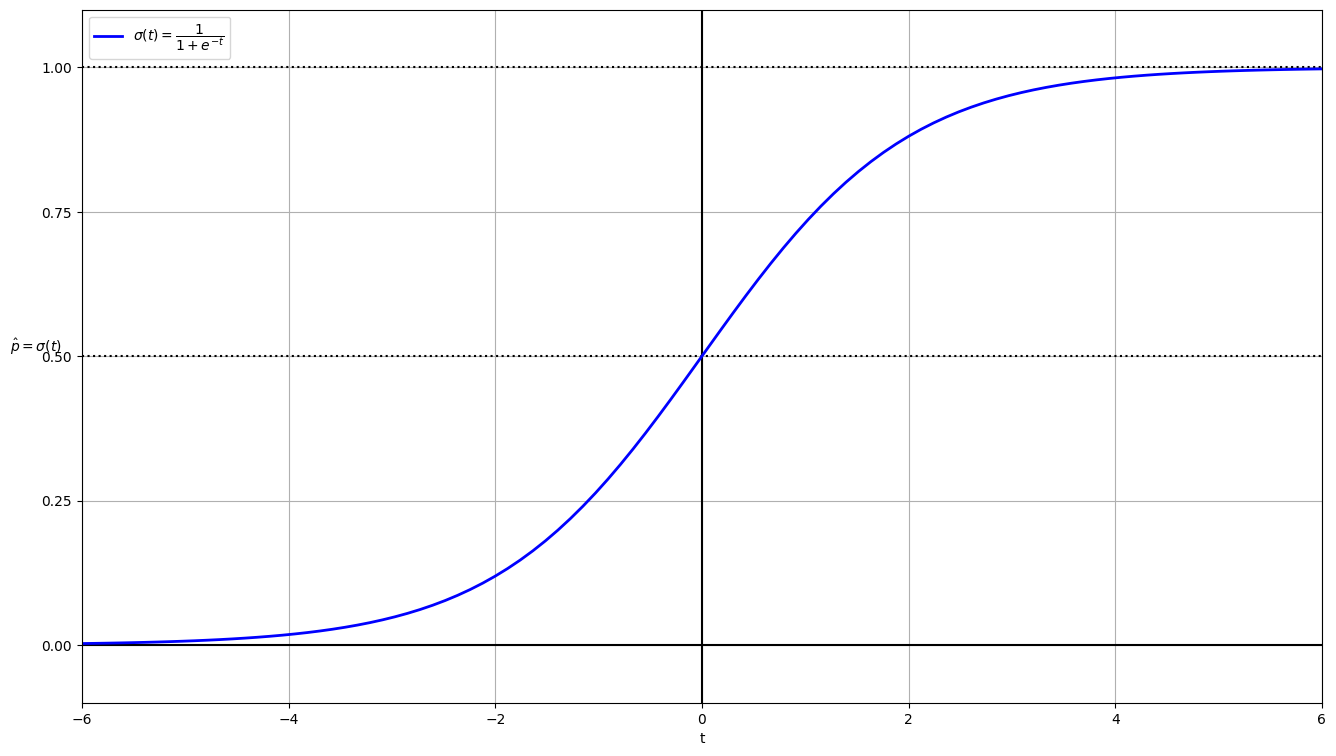

In [376]:
# demonstrate how the sigmoid function looks like using the formula above

t_max = 6
t_min = -t_max
t = np.linspace(t_min, t_max, 100) # 100 numbers from -6 to 6, meaning we have t as vector.
sigmoid_counterpart_of_t = 1 / (1 + np.exp(-t))

plt.figure(figsize=(16, 9))

# white lines
plt.plot([t_min, t_max], [0, 0], "k-")
plt.plot([t_min, t_max], [0.5, 0.5], "k:")
plt.plot([t_min, t_max], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")

# blue line
plt.plot(t, sigmoid_counterpart_of_t, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")

plt.xlabel("t")
plt.ylabel("$\hat{p} = \sigma(t)$", rotation=0)
plt.legend(loc="upper left")
plt.axis((t_min, t_max, -0.1, 1.1))
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()

# below you see logistic function. And it is used to map any real-valued number to a range between 0 and 1. This is crucial for logistic regression, because it is used to estimate the probability that a given instance belongs to a particular class based on the threshold which is 0.5.
# TODO: It is still unclear to me if the siqmoid function requires the data at x axis always centered at 0. Because when I was trying to input data into the function which were not centered at 0, I did not see then the full S shape. Maybe I did something wrong. I do not know. Also I asked GPT4 about it, but it did not answer any good example.

Once the Logistic Regression model has estimated the probability $\hat{p} = h_\theta(x)$ that an instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily (see Equation below).

Logistic Regression model prediction:
$\hat{y} = \begin{cases} 0 & \text{if } \hat{p} < 0.5 \\ 1 & \text{if } \hat{p} \geq 0.5 \end{cases}$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \geq 0.5$ when $t \geq 0$, so a Logistic Regression model predicts 1 if $\theta^T \cdot x$ is positive, and 0 if it is negative.

The score $t$ is often called the logit. The name comes from the fact that the logit function, defined as $logit(p) = log(p / (1 - p))$, is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability $\hat{p}$, you will find that the result it $t$. The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

#### TRAINING AND COST FUNCTION
Now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0)$. This idea is captured by the cost function shown in Equation below for a single training instance $x$.

Cost function of a single training instance:
$c(\theta) = \begin{cases} -log(\hat{p}) & \text{if } y = 1 \\ -log(1 - \hat{p}) & \text{if } y = 0 \end{cases}$

This cost function makes sense because –$log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, –$log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called the log loss, shown in Equation below.

Logistic Regression cost function (log loss):
$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} log(\hat{p}^{(i)}) + (1 - y^{(i)}) log(1 - \hat{p}^{(i)})]$

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regards to the $j$th model parameter $\theta_j$ is given by Equation below.

Logistic cost function partial derivatives:
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^T \cdot x^{(i)}) - y^{(i)}) x_j^{(i)}$

This equation looks very much like the equation for the Gradient Descent step for Linear Regression that we saw earlier. For each instance it computes the prediction error and multiplies it by the $j$th feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That is how you train a Logistic Regression model. To recap, for Stochastic GD you would just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

#### DECISION BOUNDARIES OF LOG REGRESSION
Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica (see Figure below).

![flowers](..\images\iris_flowers.png)

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First let’s load the data:

In [377]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [378]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [379]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [380]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [381]:
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [382]:
print(iris.target)   # note that the instances are not shuffled

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [383]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [384]:
 # train a model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# filter the data to have only petal width and target virginica
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

# split the data
X_train, _, y_train, _ = train_test_split(X, y, random_state=42)

# train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [385]:
X_train

array([[0.2],
       [0.1],
       [1.9],
       [1.6],
       [1.5],
       [0.4],
       [0.2],
       [1. ],
       [1.5],
       [1.8],
       [1.4],
       [2.5],
       [1.3],
       [2.1],
       [1.5],
       [0.2],
       [2. ],
       [1. ],
       [0.2],
       [0.3],
       [0.4],
       [1. ],
       [1.8],
       [0.2],
       [0.2],
       [0.5],
       [1.3],
       [0.2],
       [1.2],
       [2.2],
       [0.2],
       [1.3],
       [2. ],
       [0.2],
       [1.8],
       [1.9],
       [1. ],
       [1.5],
       [2.3],
       [1.3],
       [0.4],
       [1. ],
       [1.9],
       [0.2],
       [0.2],
       [1.1],
       [1.7],
       [0.2],
       [2.4],
       [0.2],
       [0.6],
       [1.8],
       [1.1],
       [2.3],
       [1.6],
       [1.4],
       [2.3],
       [1.3],
       [0.2],
       [0.1],
       [1.5],
       [1.8],
       [0.2],
       [0.3],
       [0.2],
       [1.5],
       [2.4],
       [0.3],
       [2.1],
       [2.5],
       [0.2],
      

In [386]:
y_train

array([False, False,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True])

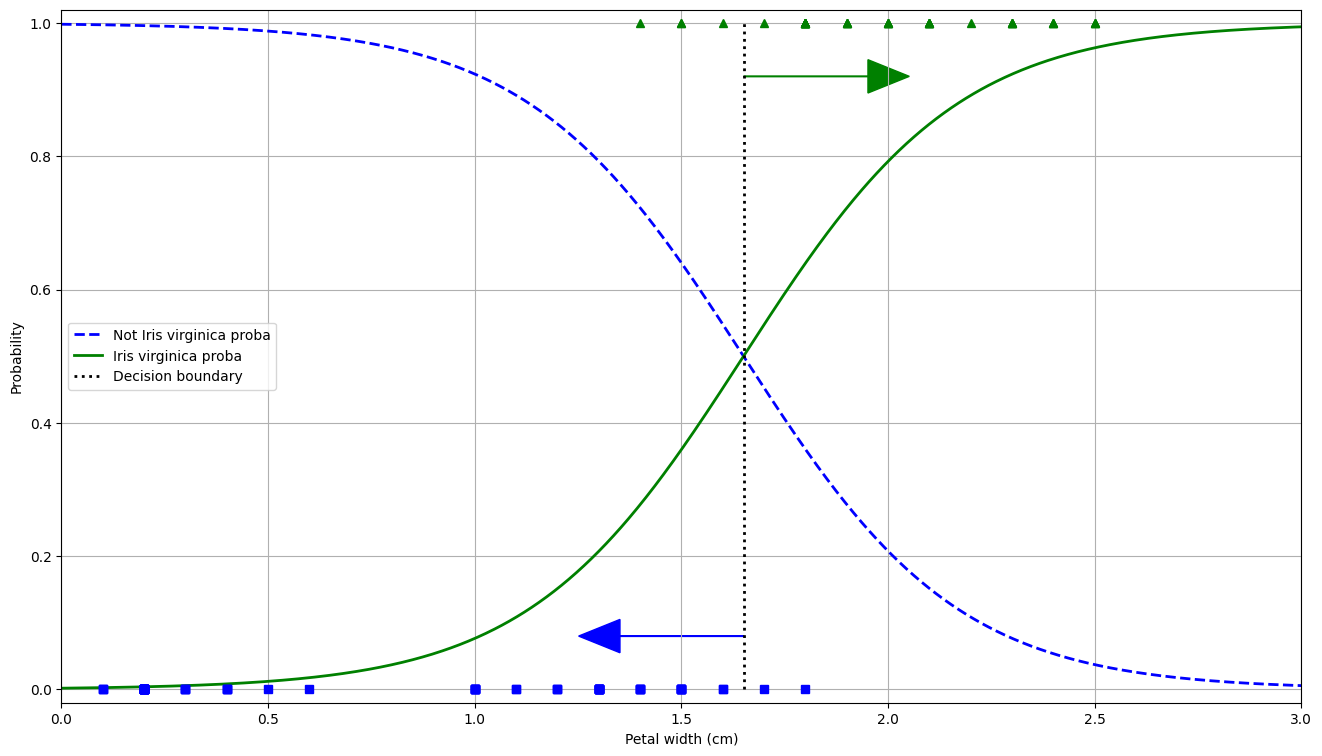

decision_boundary=1.6516516516516517


In [387]:
# create a unseen data and predict 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_probability = log_reg.predict_proba(X_new)

# filter out all values of X_new based on indexes of y_proba which are greater or equal to 0.5. Then take the first value of the 2D array with syntax [0, 0].
decision_boundary = X_new[y_probability[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(16, 9))

# y_probability is number between 0 and 1 of not being Iris-Virginica and being Iris-Virginica  
plt.plot(X_new, y_probability[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_probability[:, 1], "g-", linewidth=2, label="Iris virginica proba")

# the decision boundary, where the probability is 50%
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.arrow(
    x=decision_boundary, # the x coordinate of the arrow start
    y=0.08, # the y coordinate of the arrow start
    dx=-0.3, # direction of the arrow along x axis (here point to the left)
    dy=0, # direction of the arrow along y axis (here no direction)
    head_width=0.05,
    head_length=0.1, 
    fc="b", # color of the arrow head
    ec="b" # color of the arrow edge
)
plt.arrow(
    x=decision_boundary, 
    y=0.92, 
    dx=0.3, 
    dy=0, 
    head_width=0.05, 
    head_length=0.1, 
    fc="g", 
    ec="g"
)

# squares and triangles of actual data from original dataset
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs") # not virginica
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^") # virginica


plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis((0, 3, -0.02, 1.02))
plt.grid()

plt.show()

print(f"{decision_boundary=}")

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [388]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

The figure below shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

In [389]:
# take two features out of the X
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# make true only the virginica flowers in the target
y = iris.target_names[iris.target] == 'virginica'
# split the data
X_train, _, y_train, _ = train_test_split(X, y, random_state=42)

In [390]:
X_train

array([[1.4, 0.2],
       [1.5, 0.1],
       [5.1, 1.9],
       [4.5, 1.6],
       [4.7, 1.5],
       [1.3, 0.4],
       [1.5, 0.2],
       [3.7, 1. ],
       [5.1, 1.5],
       [5.5, 1.8],
       [4.4, 1.4],
       [6.1, 2.5],
       [4.2, 1.3],
       [6.6, 2.1],
       [4.5, 1.5],
       [1.4, 0.2],
       [6.7, 2. ],
       [4.1, 1. ],
       [1.4, 0.2],
       [1.3, 0.3],
       [1.9, 0.4],
       [3.5, 1. ],
       [4.9, 1.8],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.7, 0.5],
       [4.2, 1.3],
       [1.5, 0.2],
       [4.2, 1.2],
       [6.7, 2.2],
       [1.4, 0.2],
       [4.3, 1.3],
       [5. , 2. ],
       [1.4, 0.2],
       [4.8, 1.8],
       [5.1, 1.9],
       [4. , 1. ],
       [4.5, 1.5],
       [5.4, 2.3],
       [4. , 1.3],
       [1.7, 0.4],
       [3.3, 1. ],
       [5.3, 1.9],
       [1.4, 0.2],
       [1.2, 0.2],
       [3.8, 1.1],
       [5. , 1.7],
       [1.5, 0.2],
       [5.1, 2.4],
       [1.5, 0.2],
       [1.6, 0.6],
       [4.8, 1.8],
       [3. ,

In [391]:
y_train

array([False, False,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True])

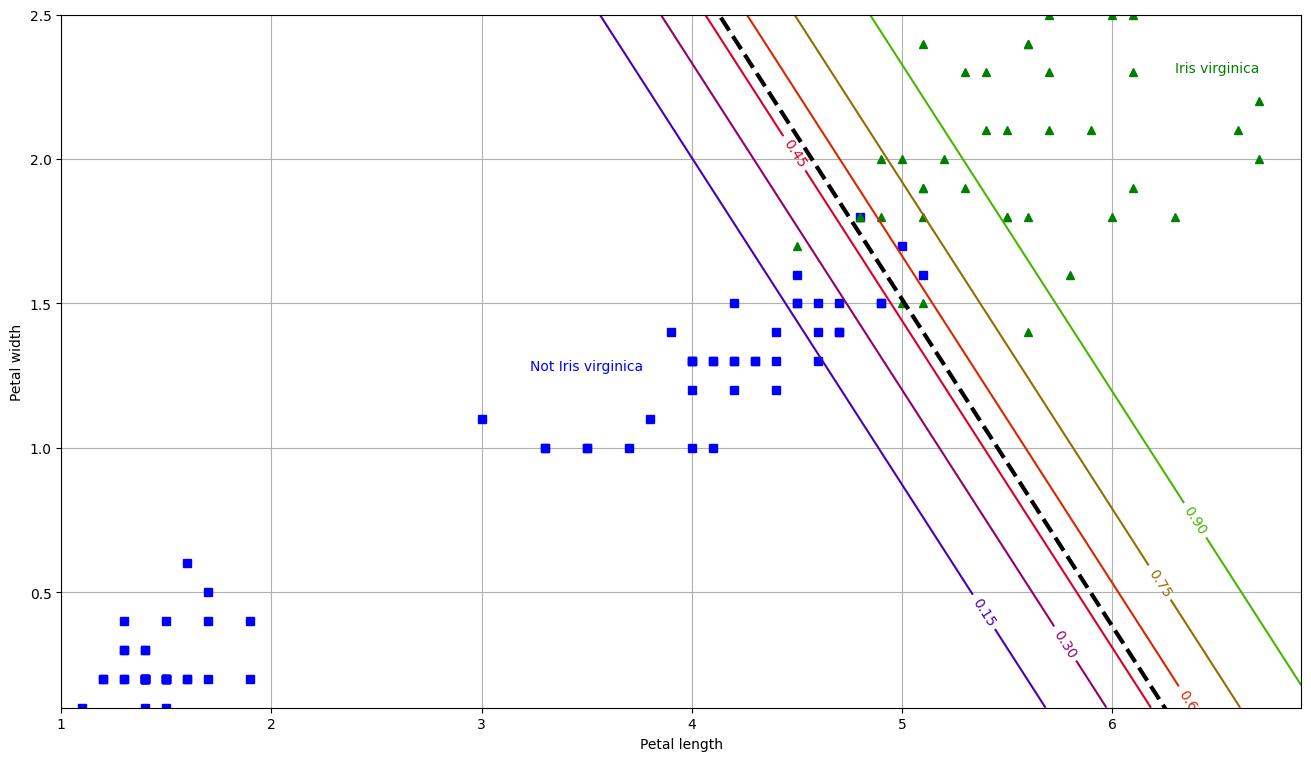

boundary_range_y_axis=array([ 6.04207497, -0.63541929])
petal_range_x_axis=array([1. , 6.9])


In [392]:
# train the model
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
petal_length, petal_width = np.meshgrid(np.linspace(1, 6.9, 500).reshape(-1, 1),
                                        np.linspace(0.1, 2.5, 500).reshape(-1, 1))

# these two rows are visualised in cells below
X_new = np.c_[petal_length.ravel(), petal_width.ravel()]
y_probability = log_reg.predict_proba(X_new)

# reshape the second column (meaning that the given coordinate is label 1 -> Iris-Virginica) to 2D array which will match the shape of petal_length and petal_width
y_probability_2D = y_probability[:, 1].reshape(petal_length.shape)

# 50% decision boundary
# "-" will flip the line at y-axis. (Will flip the boundary)
# In binary classification, to get the decision boundary, you have to multiply the first theta parameter with the feature vector and add bias. Then you divide the whole result with the second theta parameter. If you want to do that with 3 features and visualise the decision boundary in 3D the system is the same just follow the formula: boundary_range_z_axis = -((theta_0 + theta_1 * x + theta_2 * y) / theta_3)

petal_range_x_axis = np.array([1, 6.9])
boundary_range_y_axis = -((log_reg.coef_[0, 0] * petal_range_x_axis + log_reg.intercept_[0]) / log_reg.coef_[0, 1])

plt.figure(figsize=(16, 9))

# blue squares and green triangles
# filter petal length [filter, 0] and width [filter, 1] of not virginica (y_train == 0)
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
# filter petal length and width of virginica
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")

# create automatically decision boundaries with percentages
contour = plt.contour(petal_length, petal_width, y_probability_2D, cmap="brg")
plt.clabel(contour, inline=True) # add contour labels into the decision lines

# dashed line 50% probability
plt.plot(petal_range_x_axis, boundary_range_y_axis, "k--", linewidth=3)

plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis((1, 6.9, 0.1, 2.5))
plt.grid()
plt.show()

# do not be confused that the coordinates do not match the edges of the 50% decision boundary. It is because we have hardcoded plt.axis above. Comment out the plt.axis if you want to see the full decision boundary.
print(f"{boundary_range_y_axis=}")
print(f"{petal_range_x_axis=}")

In [393]:
# each column represents coordinates of a point on the figure
X_new

array([[1.        , 0.1       ],
       [1.01182365, 0.1       ],
       [1.02364729, 0.1       ],
       ...,
       [6.87635271, 2.5       ],
       [6.88817635, 2.5       ],
       [6.9       , 2.5       ]])

In [394]:
# probability of a given coordinate to be Iris-Virginica (there are probabilities for both classses 0-no and 1-yes)
print(f"{y_probability.shape=}")
y_probability

y_probability.shape=(250000, 2)


array([[9.99999894e-01, 1.05933531e-07],
       [9.99999890e-01, 1.09835139e-07],
       [9.99999886e-01, 1.13880447e-07],
       ...,
       [2.24325826e-04, 9.99775674e-01],
       [2.16358957e-04, 9.99783641e-01],
       [2.08674969e-04, 9.99791325e-01]])

In [395]:
print(f"{y_probability_2D.shape=}")
y_probability_2D

y_probability_2D.shape=(500, 500)


array([[1.05933531e-07, 1.09835139e-07, 1.13880447e-07, ...,
        8.71622395e-01, 8.75615448e-01, 8.79501471e-01],
       [1.07319615e-07, 1.11272274e-07, 1.15370512e-07, ...,
        8.73069996e-01, 8.77024375e-01, 8.80872370e-01],
       [1.08723836e-07, 1.12728213e-07, 1.16880074e-07, ...,
        8.74503624e-01, 8.78419560e-01, 8.82229760e-01],
       ...,
       [6.77480706e-05, 7.02431059e-05, 7.28300220e-05, ...,
        9.99769767e-01, 9.99777943e-01, 9.99785830e-01],
       [6.86344576e-05, 7.11621346e-05, 7.37828942e-05, ...,
        9.99772740e-01, 9.99780811e-01, 9.99788595e-01],
       [6.95324410e-05, 7.20931865e-05, 7.47482324e-05, ...,
        9.99775674e-01, 9.99783641e-01, 9.99791325e-01]])

Just like the other linear models, Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. Scitkit-Learn actually adds an $\ell_2$ penalty by default. This is controlled by the hyperparameter $C$, as you will see in a second.

The hyperparameter controlling the regularization strength of a SKLearn LogisticRegression model is not alpha (as in other linear models), but its inverse: $C$. The higher the value of $C$, the less the model is regularized.

# Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is quite simple: when given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as shown in Equation below.

Softmax score for class $k$:
$s_k(x) = (\theta^{(k)})^T \cdot x$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a parameter matrix $\Theta$.



Once you have computed the score of every class for the instance $x$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function (Equation below). The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Softmax function:
$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$

In this equation:
- $K$ is the number of classes.
- $s(x)$ is a vector containing the scores of each class for the instance $x$.
- $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation below.

Softmax Regression classifier prediction:
$\hat{y}$ \
$= \underset{k}{\mathrm{argmax}}\ \sigma(s(x))_k$ \
$= \underset{k}{\mathrm{argmax}}\ s_k(x)$ \
$= \underset{k}{\mathrm{argmax}}\ ((\theta^{(k)})^T \cdot x)$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(s(x))_k$.

The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown in Equation below, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Cross entropy cost function:
$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} log(\hat{p}_k^{(i)})$

In this equation:
- $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes $(K = 2)$, this cost function is equivalent to the Logistic Regression’s cost function (log loss equation).

#### CROSS ENTROPY
Cross entropy originates from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using 3 bits since $2^3 = 8$. However, if you think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross entropy will just be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions are wrong (e.g., if it rains often), cross entropy will be greater by an amount called the Kullback–Leibler (KL) divergence.

The cross entropy between two probability distributions $p$ and $q$ is defined as $H(p, q) = -\sum_x p(x) log(q(x))$. For more details, you can check video on https://homl.info/xentropy

The gradient vector of this cost function with regards to $\theta^{(k)}$ is given by Equation below.

Cross entropy gradient vector for class $k$:
$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) x^{(i)}$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies $\ell_2$ regularization by default, which you can control using the hyperparameter $C$.

In [396]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, _, y_train, _ = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

So the next time you find an iris with 5 cm long and 2 cm wide, you can ask your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2) with ~96% probability (or Iris-Versicolor with ~4% probability):

In [397]:
softmax_reg.predict([[5, 2]])

array([2])

In [398]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

Figure below shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear. The figure also shows the probabilities for the Iris versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

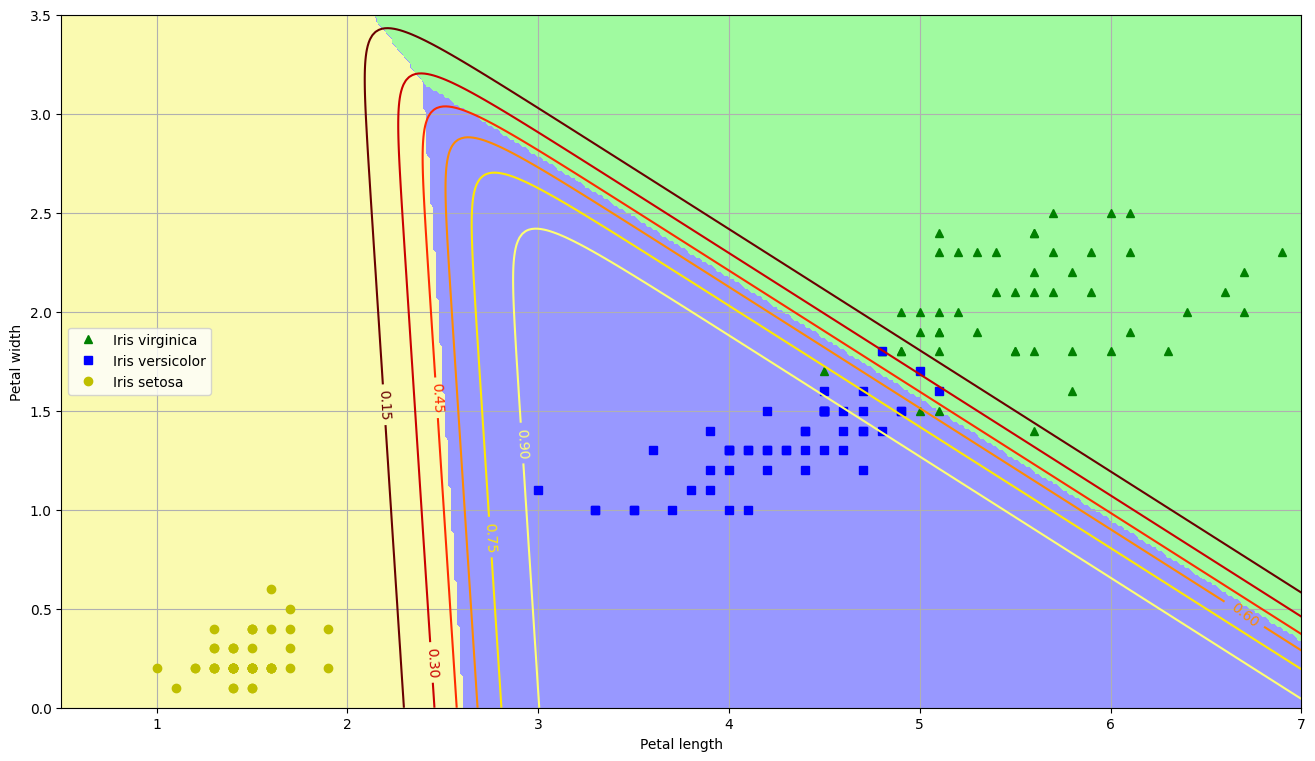

In [399]:


from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

petal_length, petal_width = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                                        np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[petal_length.ravel(), petal_width.ravel()]

y_probability = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_probability[:, 1].reshape(petal_length.shape)
y_probability_2D = y_predict.reshape(petal_length.shape)

plt.figure(figsize=(16, 9))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(petal_length, petal_width, y_probability_2D, cmap=custom_cmap)
contour = plt.contour(petal_length, petal_width, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis((0.5, 7, 0, 3.5))
plt.grid()
plt.show()

# EXTRA MATERIAL

1. If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.
2. If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.
3. Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex. Convex means that if you draw a straight line between any two points on the curve, the line never crosses the curve.
4. If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.
5. If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.
6. Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.
7. Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.
8. If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ₂ penalty (Ridge) or an ℓ₁ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.
9. If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter α.
10. 
- A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
- Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
- Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.
11. If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

####  12. Batch Gradient Descent with early stopping for Softmax Regression
Exercise: Implement Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.
(I already created the softmax regression model from scratch in a different notebook, but for the sake of this exercise/example below is copied code from the book.)

In [400]:
# reuse the iris dataset
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [401]:
# add the bias term for every instance (ones to the first column)
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [402]:
X_with_bias

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [403]:
# The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's train_test_split() function, but again, we want to do it manually:

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]


In [404]:
# function to convert targets to one-hot vectors
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [405]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [406]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [407]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [408]:
# scale the data
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train_original = X_train.copy()
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

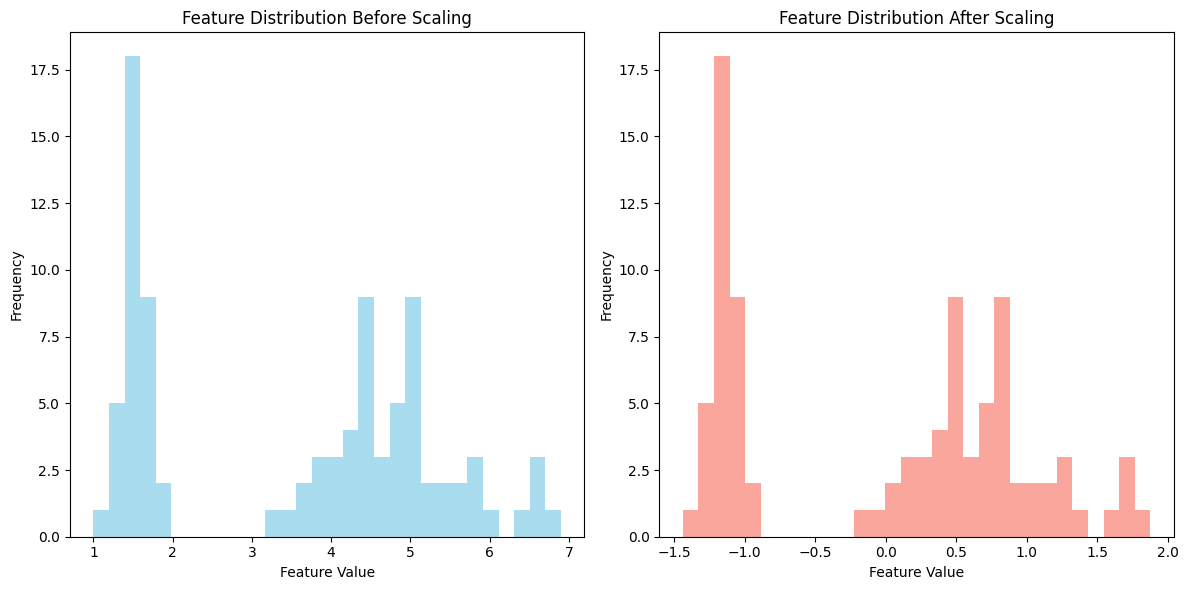

In [409]:
# JUST AN EXAMPLE HOW DO THE DATA LOOK LIKE AFTER SUCH SCALING
# Visualize the dataset before and after scaling for the second feature
plt.figure(figsize=(12, 6))

# Before scaling
plt.subplot(1, 2, 1)
plt.hist(X_train_original[:, 1], bins=30, color='skyblue', alpha=0.7)
plt.title('Feature Distribution Before Scaling')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

# After scaling
plt.subplot(1, 2, 2)
plt.hist(X_train[:, 1], bins=30, color='salmon', alpha=0.7)
plt.title('Feature Distribution After Scaling')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now let's implement the Softmax function. Recall that it is defined by the following equation:
$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$

In [410]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [411]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:
$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} log(\hat{p}_k^{(i)})$

And the equation for the gradients:
$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) x^{(i)}$

Note that $(\hat{p}_k^{(i)})$ may not be computable if$\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\hat{p}_k^{(i)}$ to avoid getting nan values.

In [412]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = np.dot(X_train, Theta) # fyi you can also use "@" operator as a matrix multiplication
    # logits = X_train @ Theta
    
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean().round(4))

    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * np.dot(X_train.T, error) 
    Theta = Theta - eta * gradients

0 3.7086
1000 0.1452
2000 0.1301
3000 0.1201
4000 0.1137
5000 0.11


In [413]:
# the best parameters. For each row, starting with bias and other two features, there are three columns/thetas/weights for each class.
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [414]:
# make predictions
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

Well, this model looks pretty ok. For the sake of the exercise, let's add a bit of $l_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $l_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of $\Theta$ since this corresponds to the bias term). Also, let's try increasing the learning rate $\eta$.

In [415]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    # replace first row with zeros to get rid of the bias term (shown in the cell below) and concatenate the row of zeros with the rest of thetas. np.r_ is used to concatenate the arrays row-wise. (Just like you would do with np.c_ for columns)
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    # Because of the additional penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out few cells below.

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


In [416]:
np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]

array([[ 0.        ,  0.        ,  0.        ],
       [-0.02334599,  0.00389552,  0.01945047],
       [-0.01984858, -0.00495072,  0.0247993 ]])

In [417]:
# make predictions
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In this case, the $l_2$ penalty did not change the test accuracy. Perhaps try fine-tuning alpha?

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [424]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100 # regularization hyperparameter
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    Y_proba = softmax(X_train @ Theta)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 100 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        # seems like we can stop the training immediatelly due to using batch gradient descent. If we used some stochastic ones, we would have to wait for a few more iterations to be sure that the loss is not going to decrease anymore.
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
100 0.3354
200 0.3261
281 0.3256
282 0.3256 early stopping!


Oh well, still no change in validation accuracy, but at least early stopping shortened training a bit.

Now let's plot the model's predictions on the whole dataset (remember to scale all features fed to the model):

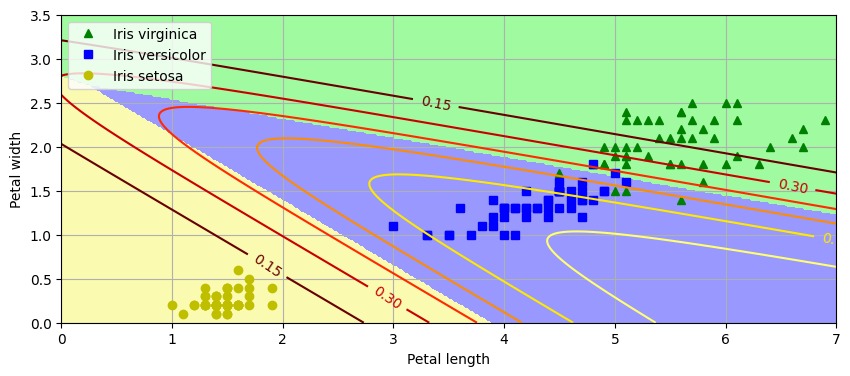

In [426]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis((0, 7, 0, 3.5))
plt.grid()
plt.show()

# you see that the decision boundaries are bit different compared to the initial example of this plot. It is due to the regularization and the fact that we used early stopping.

In [427]:
# make predictions
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

Well we get even better performance on the test set. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.